# Pathologischer Fall von Emissionen und die Möglichkeiten von ICA im Zeitbereich

### Import

In [82]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import FastICA, PCA
import pandas as pd
from pylab import rcParams
plt.rcParams['figure.figsize'] =7.8 ,3.9
plt.rcParams['legend.fontsize'] = 11
plt.rcParams["figure.dpi"] = 300
font = {'family' : 'Times New Roman','weight' : "light", 'size'   : 11}
plt.rc('font', **font)

### Constants

In [3]:
cleanFreq = 50 #[Hz]
cleanAmpl = 15 #[A]

samplingRate = 100e6 #[Sample/Sekunde]
timeIntervall = 200 * 1e-4 #[s] 00ms, d.h. 1 Perioden

noiseFreq1 = 1e3 #[Hz]
noiseAmpl1 = cleanAmpl * 0.01

noiseFreq2 = 10e3 #[Hz]
noiseAmpl2 = cleanAmpl * 0.001

### Create Basic Sinuswave

In [4]:
n_samples = samplingRate * timeIntervall
time = np.linspace(0, timeIntervall, int(n_samples)) #time in [s]

In [5]:
cleanSignal = cleanAmpl*np.sin(cleanFreq*2*np.pi*time)  # Signal 1 : sinusoidal signal
basicNoise = 0.2*np.random.normal(size=cleanSignal.shape)
noiseSignal1 = noiseAmpl1*np.sign(np.sin(noiseFreq1*2*np.pi*time))  # Signal 2 : noise signal1
noiseSignal2 = noiseAmpl2*np.sign(np.sin(noiseFreq2*2*np.pi*time))  # Signal 3 : noise signal2

noisedSignal = cleanSignal + noiseSignal1 + noiseSignal2

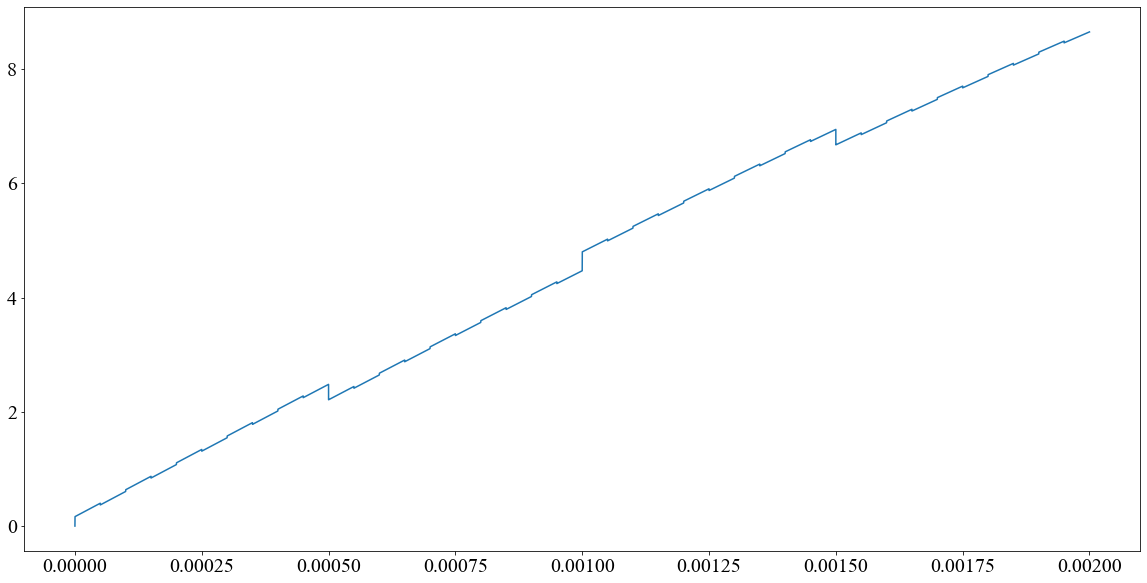

In [8]:
plt.plot(time[:200000],noisedSignal[:200000])
plt.show()

### ICA
We insert the Basic clean Sinus Wave and the noisedSignal, containing two frequencies

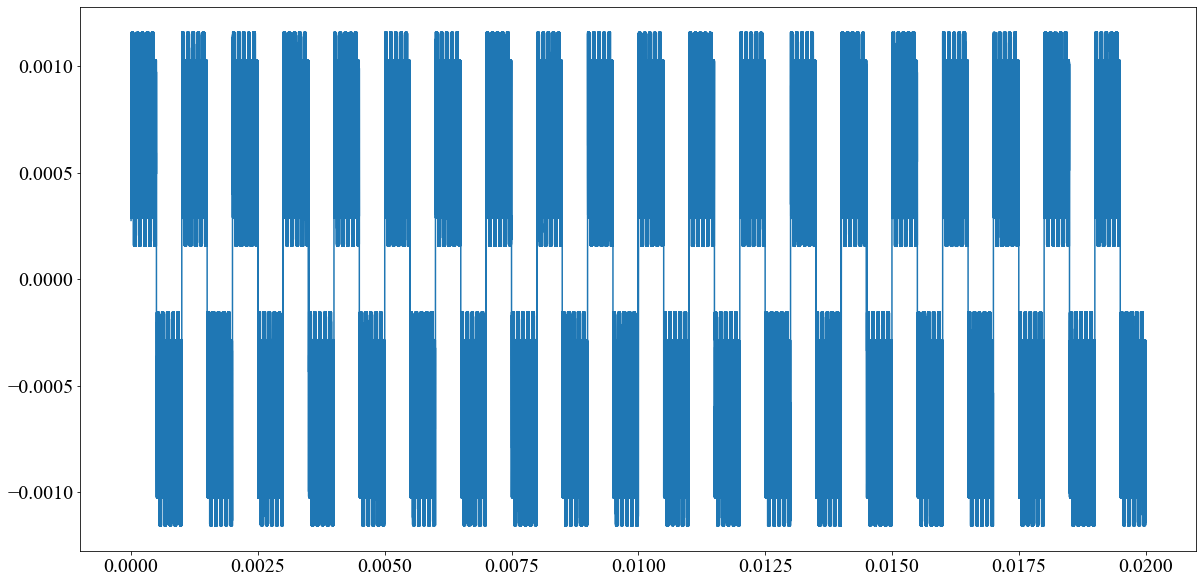

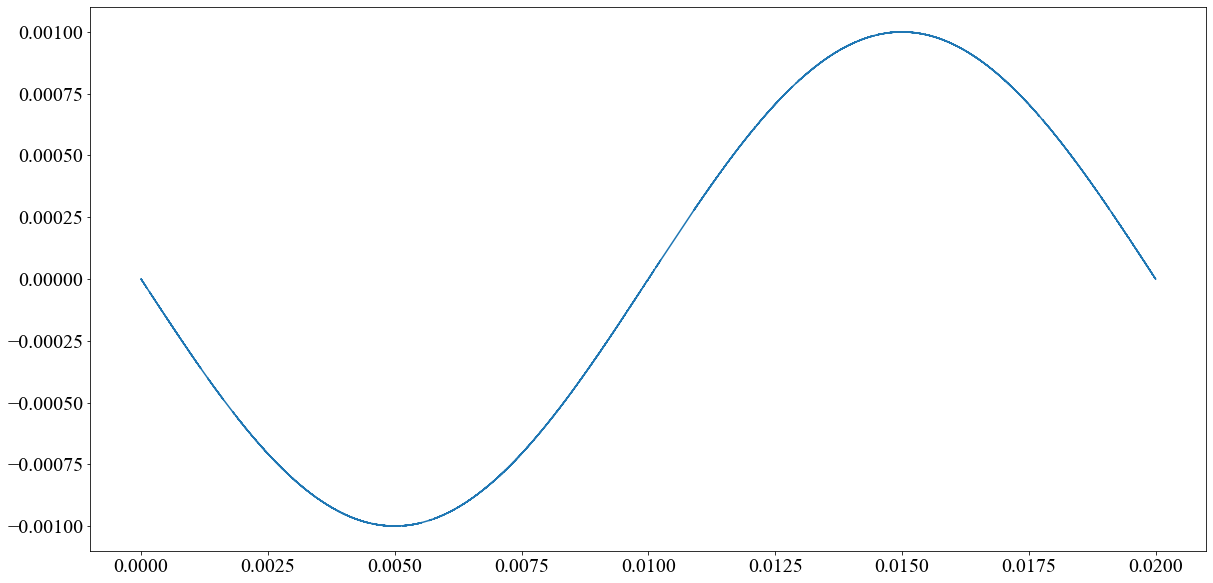

In [57]:
X = np.column_stack((cleanSignal,noisedSignal))
ica = FastICA()
S_ = ica.fit_transform(X)  # Reconstruct signals
#A_ = ica.mixing_  # Get estimated mixing matrix
plt.plot(time[:], S_[:,0])
plt.show()
plt.plot(time[:], S_[:,1])
plt.show()


We can easily get the noised Signal and the clean signal

## Now lets try random noisy signals

Plotting... noisedSignal


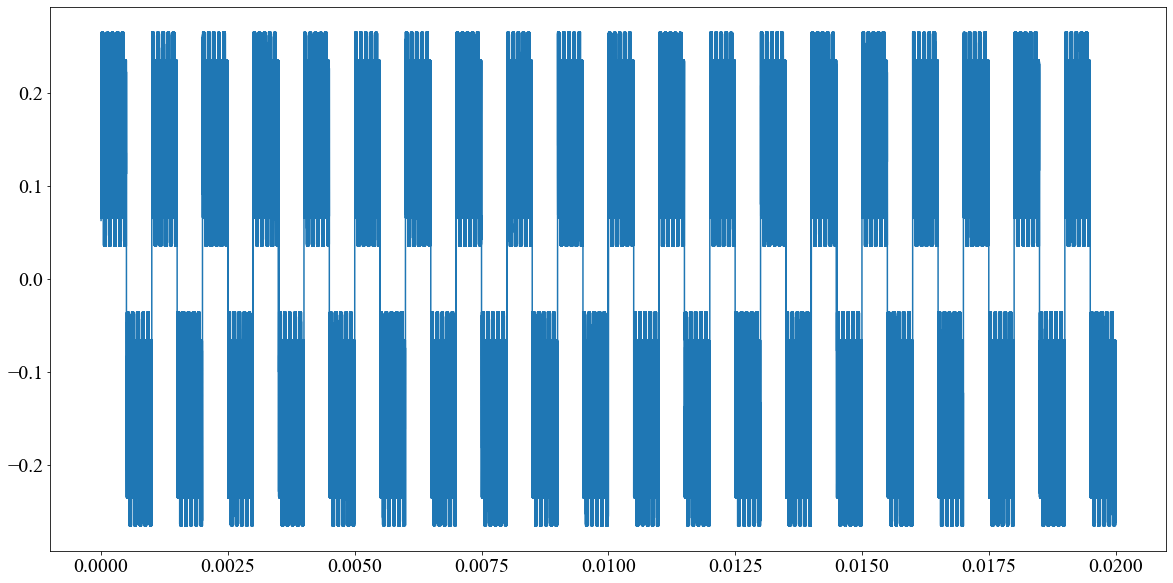

Plotting... noisedSignal-MEAN


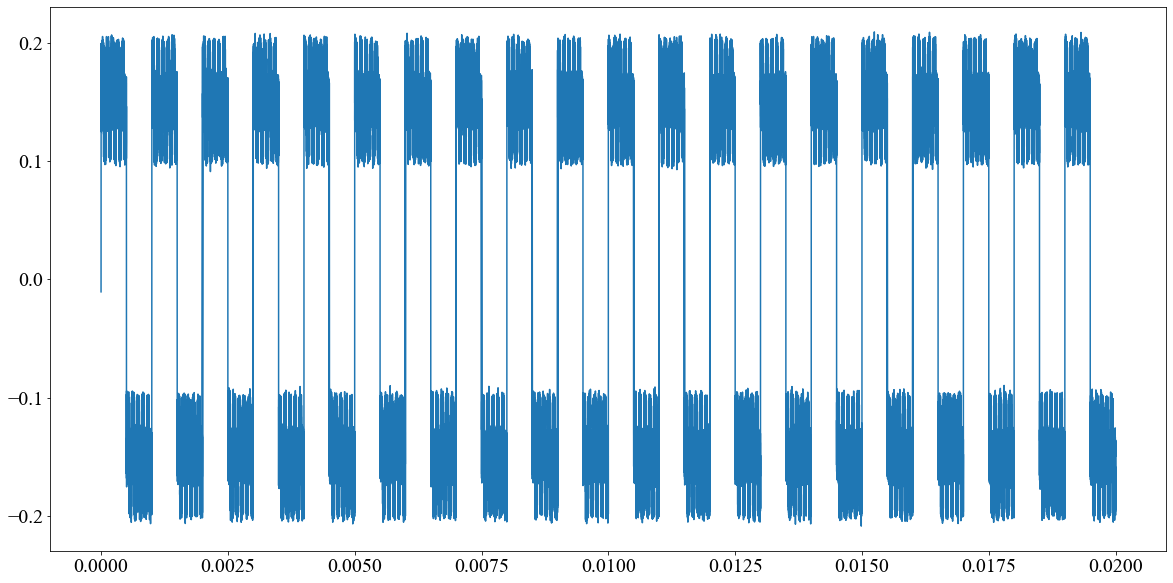

Plotting... Results


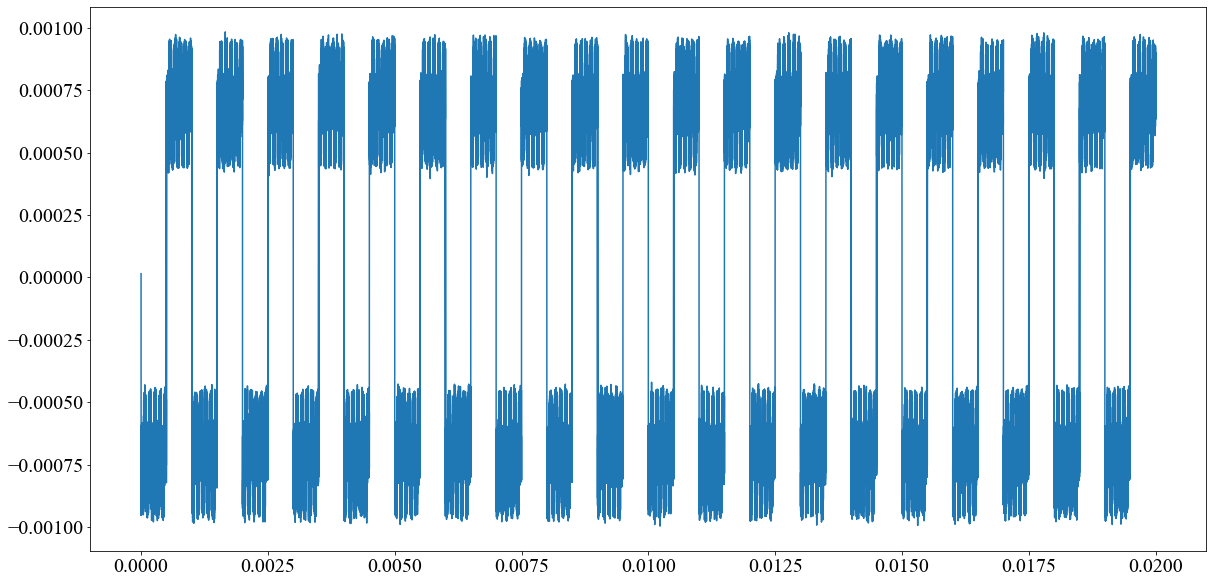

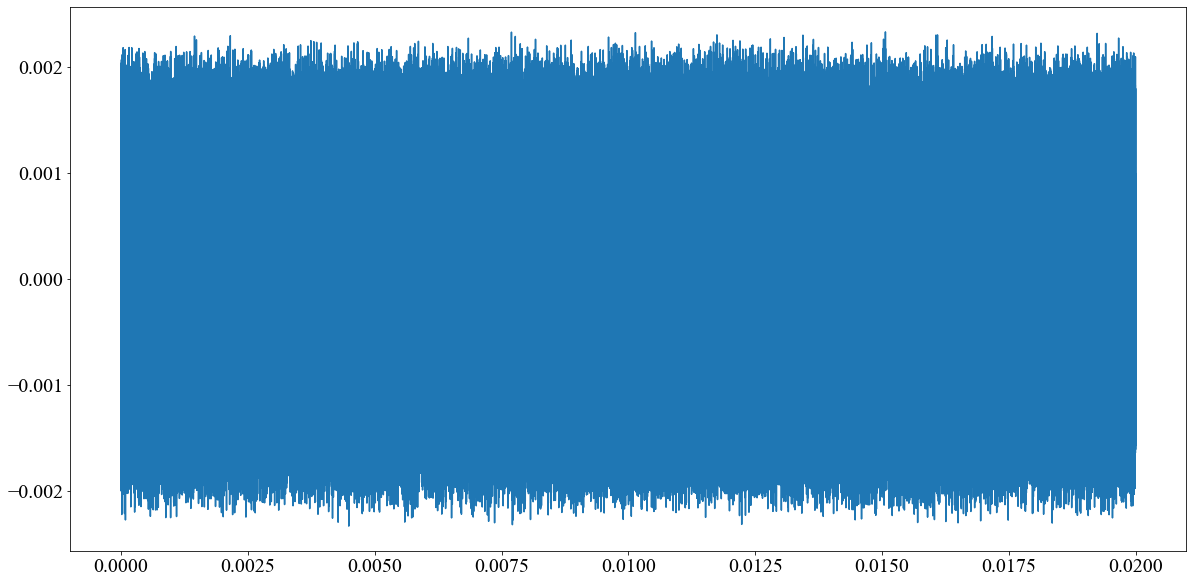

Algebra Solution ... MEASSUREMENT - FOOTPRINT


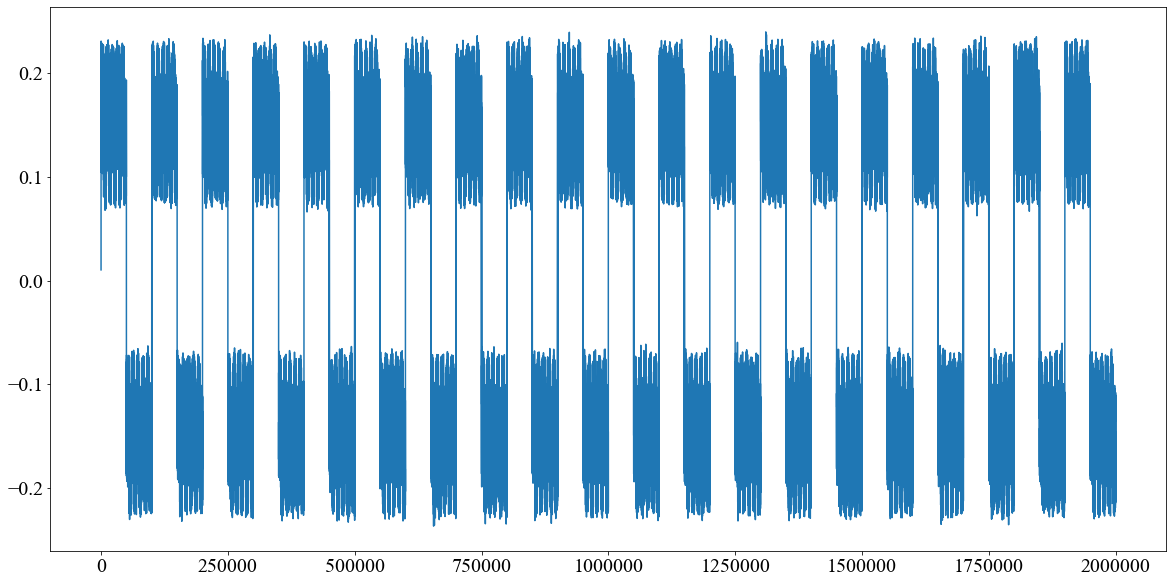

Footprint


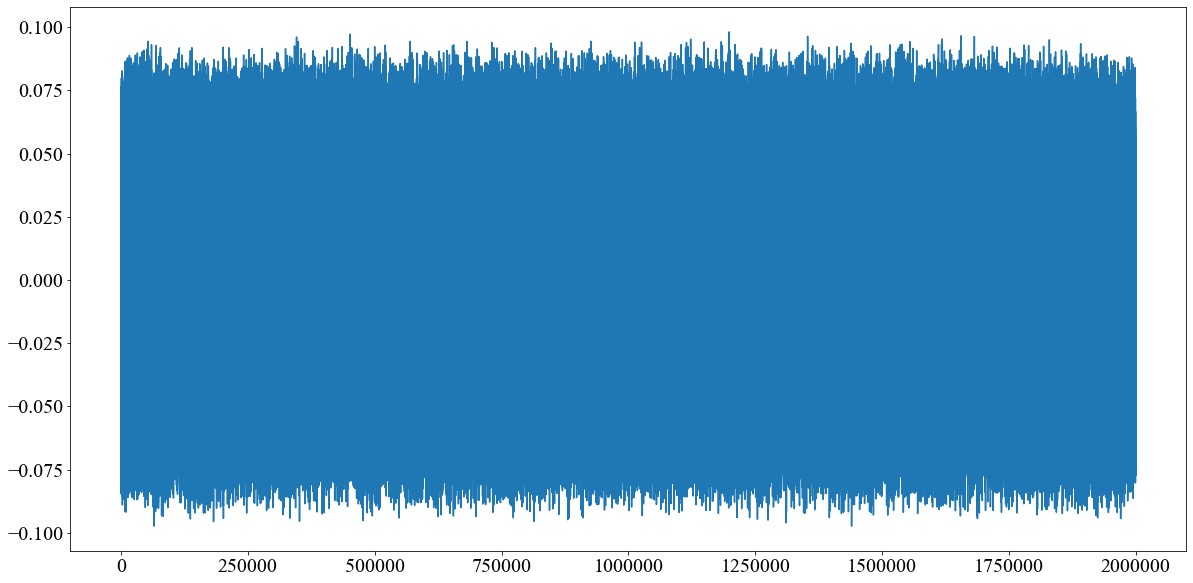

In [11]:
cleanSignal = cleanAmpl*np.sin(cleanFreq*2*np.pi*time)  # Signal 1 : sinusoidal signal
basicNoise1 = 0.2*np.random.rand(cleanSignal.shape[0])-0.1
basicNoise2 = 0.2*np.random.rand(cleanSignal.shape[0])-0.1
basicNoise3 = 0.2*np.random.rand(cleanSignal.shape[0])-0.1
basicNoise4 = 0.2*np.random.rand(cleanSignal.shape[0])-0.1
basicNoise5 = 0.2*np.random.rand(cleanSignal.shape[0])-0.1
basicNoise6 = 0.2*np.random.rand(cleanSignal.shape[0])-0.1
basicNoise7 = 0.2*np.random.rand(cleanSignal.shape[0])-0.1
basicNoise8 = 0.2*np.random.rand(cleanSignal.shape[0])-0.1

noiseSignal1 = noiseAmpl1*np.sign(np.sin(noiseFreq1*2*np.pi*time))  # Signal 2 : noise signal1
noiseSignal2 = noiseAmpl2*np.sign(np.sin(noiseFreq2*2*np.pi*time))  # Signal 3 : noise signal2

noisedSignal =  noiseSignal1 + noiseSignal2 + basicNoise1
referenceSignal =  noiseSignal1 + noiseSignal2 + basicNoise2 
referenceSignal2 =  noiseSignal1 + noiseSignal2 + basicNoise3 
referenceSignal3 =  noiseSignal1 + noiseSignal2 + basicNoise4
referenceSignal4 =  noiseSignal1 + noiseSignal2 + basicNoise5
referenceSignal5 =  noiseSignal1 + noiseSignal2 + basicNoise1*basicNoise2
referenceSignal6 =  noiseSignal1 + noiseSignal2 + basicNoise3*basicNoise4
referenceSignal7 =  noiseSignal1 + noiseSignal2 + basicNoise5*basicNoise6
referenceSignal8 =  noiseSignal1 + noiseSignal2 + basicNoise7*basicNoise8
referenceSignal9 =  noiseSignal1 + noiseSignal2 + basicNoise3*basicNoise7

totalNoise= np.column_stack((basicNoise1,basicNoise2,basicNoise3,basicNoise4))
totalNoise_mean = totalNoise.mean(axis=1)

totalSignal= np.column_stack((referenceSignal,referenceSignal2,referenceSignal3,referenceSignal4,referenceSignal5,referenceSignal6,referenceSignal7,referenceSignal8,referenceSignal9))
totalSignal_mean = totalSignal.mean(axis=1)


print("Plotting... noisedSignal")
plt.plot(time[:2000000], noisedSignal[:2000000])
plt.show()


print("Plotting... noisedSignal-MEAN")
plt.plot(time[:2000000], totalSignal_mean[:2000000])
plt.show()


X = np.column_stack((noisedSignal,referenceSignal,referenceSignal2,referenceSignal3,referenceSignal4,referenceSignal5,referenceSignal6,referenceSignal7,referenceSignal8,referenceSignal9))
ica = FastICA(2)
S_ = ica.fit_transform(X)  # Reconstruct signals
#A_ = ica.mixing_  # Get estimated mixing matrix

print("Plotting... Results")
plt.plot(time[:], S_[:,0])
plt.show()
plt.plot(time[:], S_[:,1])
plt.show()

print("Algebra Solution ... MEASSUREMENT - FOOTPRINT")
plt.plot(totalSignal_mean - totalNoise_mean)
plt.show()

print("Footprint")
plt.plot(totalNoise_mean)


# One basic Noise

Assuming that the Noise is nearly the same...

Plotting... noisedSignal-MEAN


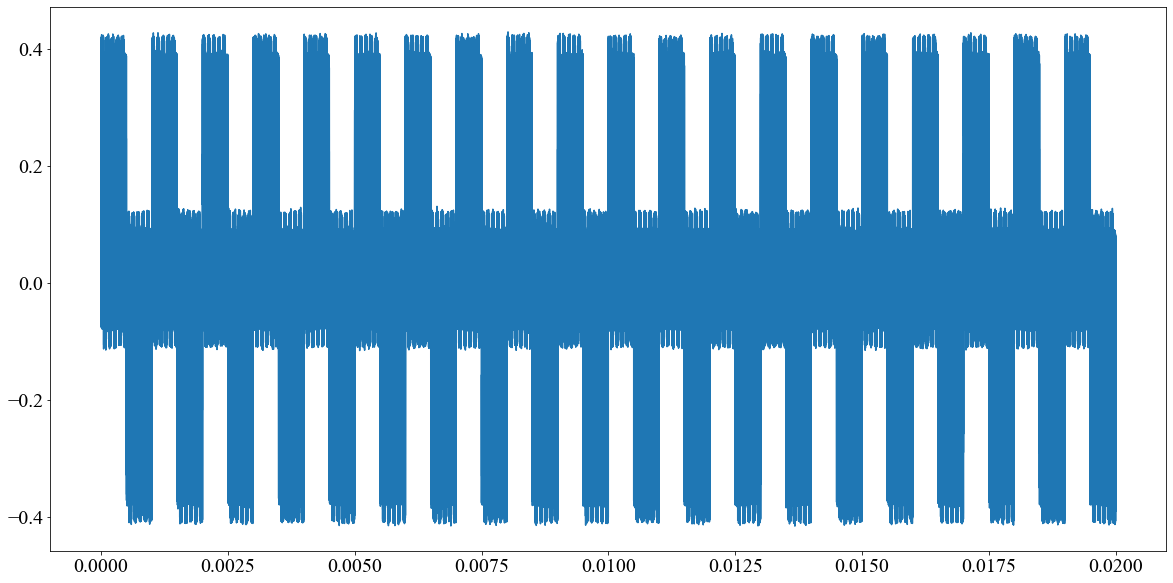

Plotting... Results


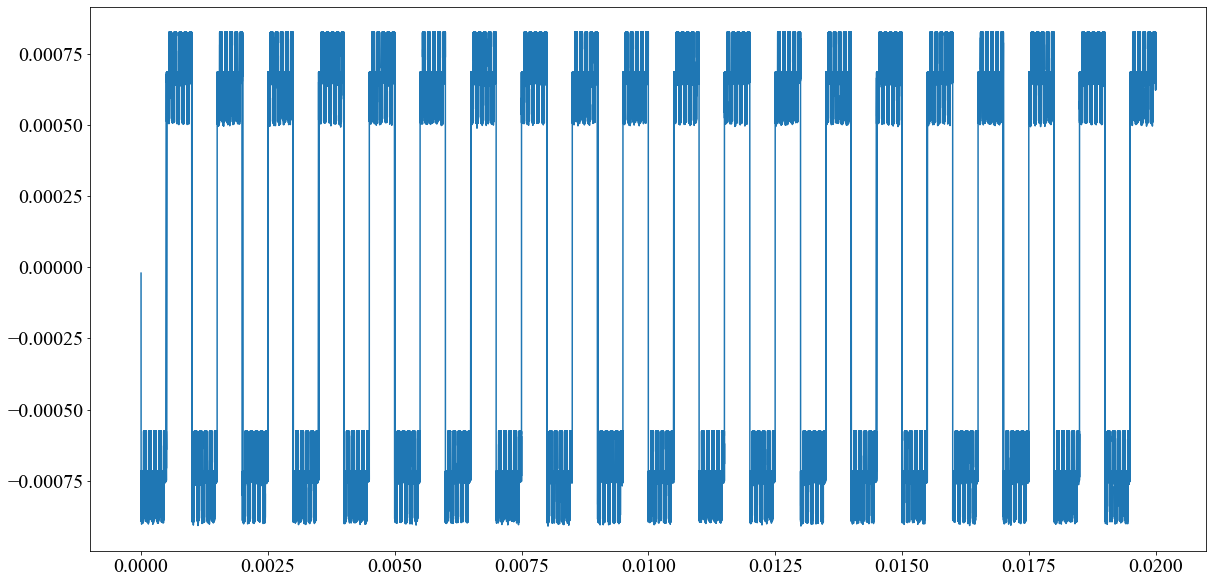

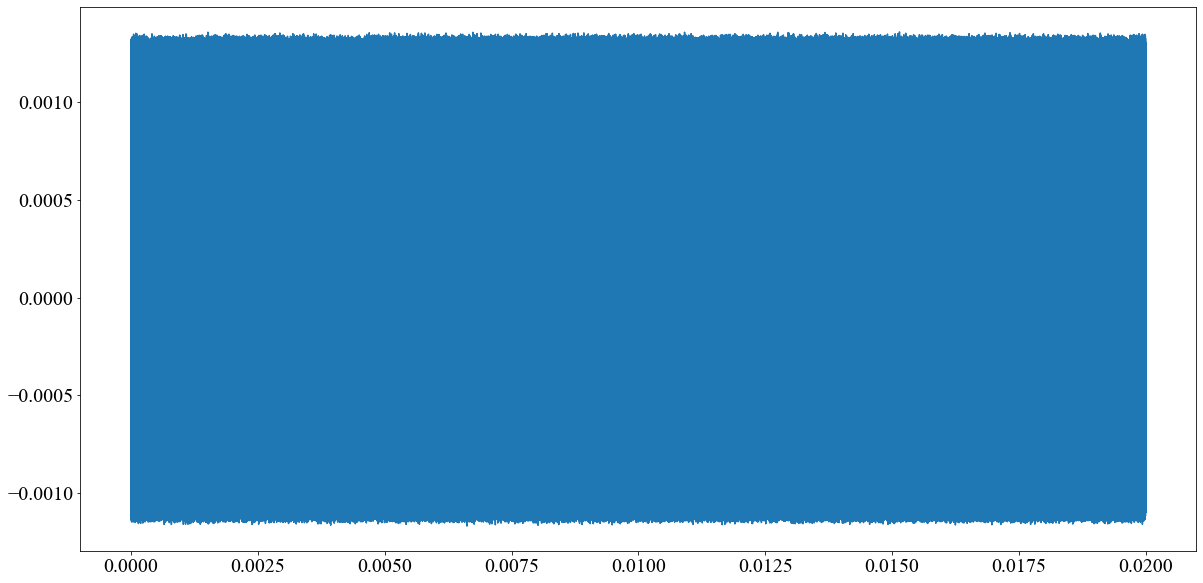

Algebra Solution ... MEASSUREMENT - FOOTPRINT


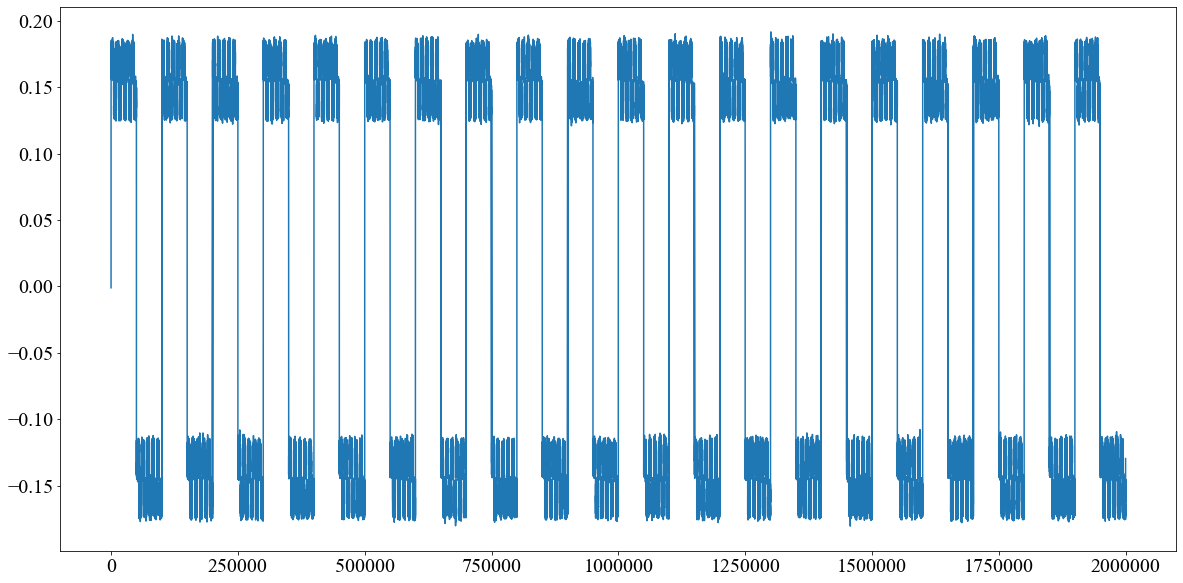

In [8]:
basicNoise1 = 0.5*np.random.rand(cleanSignal.shape[0])-0.25
basicNoise2 = 0.2*np.random.rand(cleanSignal.shape[0])
basicNoise3 = 0.2*np.random.rand(cleanSignal.shape[0])
basicNoise4 = 0.2*np.random.rand(cleanSignal.shape[0])
basicNoise5 = .2*np.random.rand(cleanSignal.shape[0])
basicNoise6 = .2*np.random.rand(cleanSignal.shape[0])
basicNoise7 = .2*np.random.rand(cleanSignal.shape[0])
basicNoise8 = .2*np.random.rand(cleanSignal.shape[0])

noiseSignal1 = noiseAmpl1*np.sign(np.sin(noiseFreq1*2*np.pi*time))  # Signal 2 : noise signal1
noiseSignal2 = noiseAmpl2*np.sign(np.sin(noiseFreq2*2*np.pi*time))  # Signal 3 : noise signal2

noisedSignal =  noiseSignal1 + noiseSignal2 + basicNoise1
referenceSignal =  noiseSignal1 + noiseSignal2 + basicNoise1 + basicNoise1*basicNoise2
referenceSignal2 =  noiseSignal1 + noiseSignal2 + basicNoise1 + basicNoise1*basicNoise3
referenceSignal3 =  noiseSignal1 + noiseSignal2 + basicNoise1 + basicNoise1*basicNoise4
referenceSignal4 =  noiseSignal1 + noiseSignal2 + basicNoise1 + basicNoise1*basicNoise5
referenceSignal5 =  noiseSignal1 + noiseSignal2 + basicNoise1 + basicNoise1*basicNoise6
referenceSignal6 =  noiseSignal1 + noiseSignal2 + basicNoise1 + basicNoise1*basicNoise7
referenceSignal7 =  noiseSignal1 + noiseSignal2 + basicNoise1 + basicNoise1*basicNoise8
referenceSignal8 =  noiseSignal1 + noiseSignal2 + basicNoise1 + basicNoise1*basicNoise8
referenceSignal9 =  noiseSignal1 + noiseSignal2 + basicNoise1 * basicNoise1

totalSignal= np.column_stack((noisedSignal, referenceSignal,referenceSignal2,referenceSignal3,referenceSignal4,referenceSignal5,referenceSignal6,referenceSignal7,referenceSignal8,referenceSignal9))
totalSignal_mean = totalSignal.mean(axis=1)

print("Plotting... noisedSignal-MEAN")
plt.plot(time[:], totalSignal_mean[:])
plt.show()


X = np.column_stack((basicNoise1,noisedSignal,referenceSignal,referenceSignal2,referenceSignal3,referenceSignal4,referenceSignal5,referenceSignal6,referenceSignal7,referenceSignal8,referenceSignal9))
ica = FastICA(2)
S_ = ica.fit_transform(X)  # Reconstruct signals
#A_ = ica.mixing_  # Get estimated mixing matrix

print("Plotting... Results")
plt.plot(time[:], S_[:,0])
plt.show()
plt.plot(time[:], S_[:,1])
plt.show()

print("Algebra Solution ... MEASSUREMENT - FOOTPRINT")
plt.plot(totalSignal_mean - basicNoise1)
plt.show()


# Try mixing multiple Signals

In [24]:
freq1 = 1e3
freq2 = 2e3
freq3 = 500

Signal1 = 1*np.sign(np.sin(freq1*2*np.pi*time))
Signal2 = 0.5*np.sign(np.sin(freq2*2*np.pi*time))
Signal3 = 0.8*(np.sin(freq3*2*np.pi*time))

C:\Users\Philipp\anaconda3\lib\site-packages\IPython\core\pylabtools.py:132: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


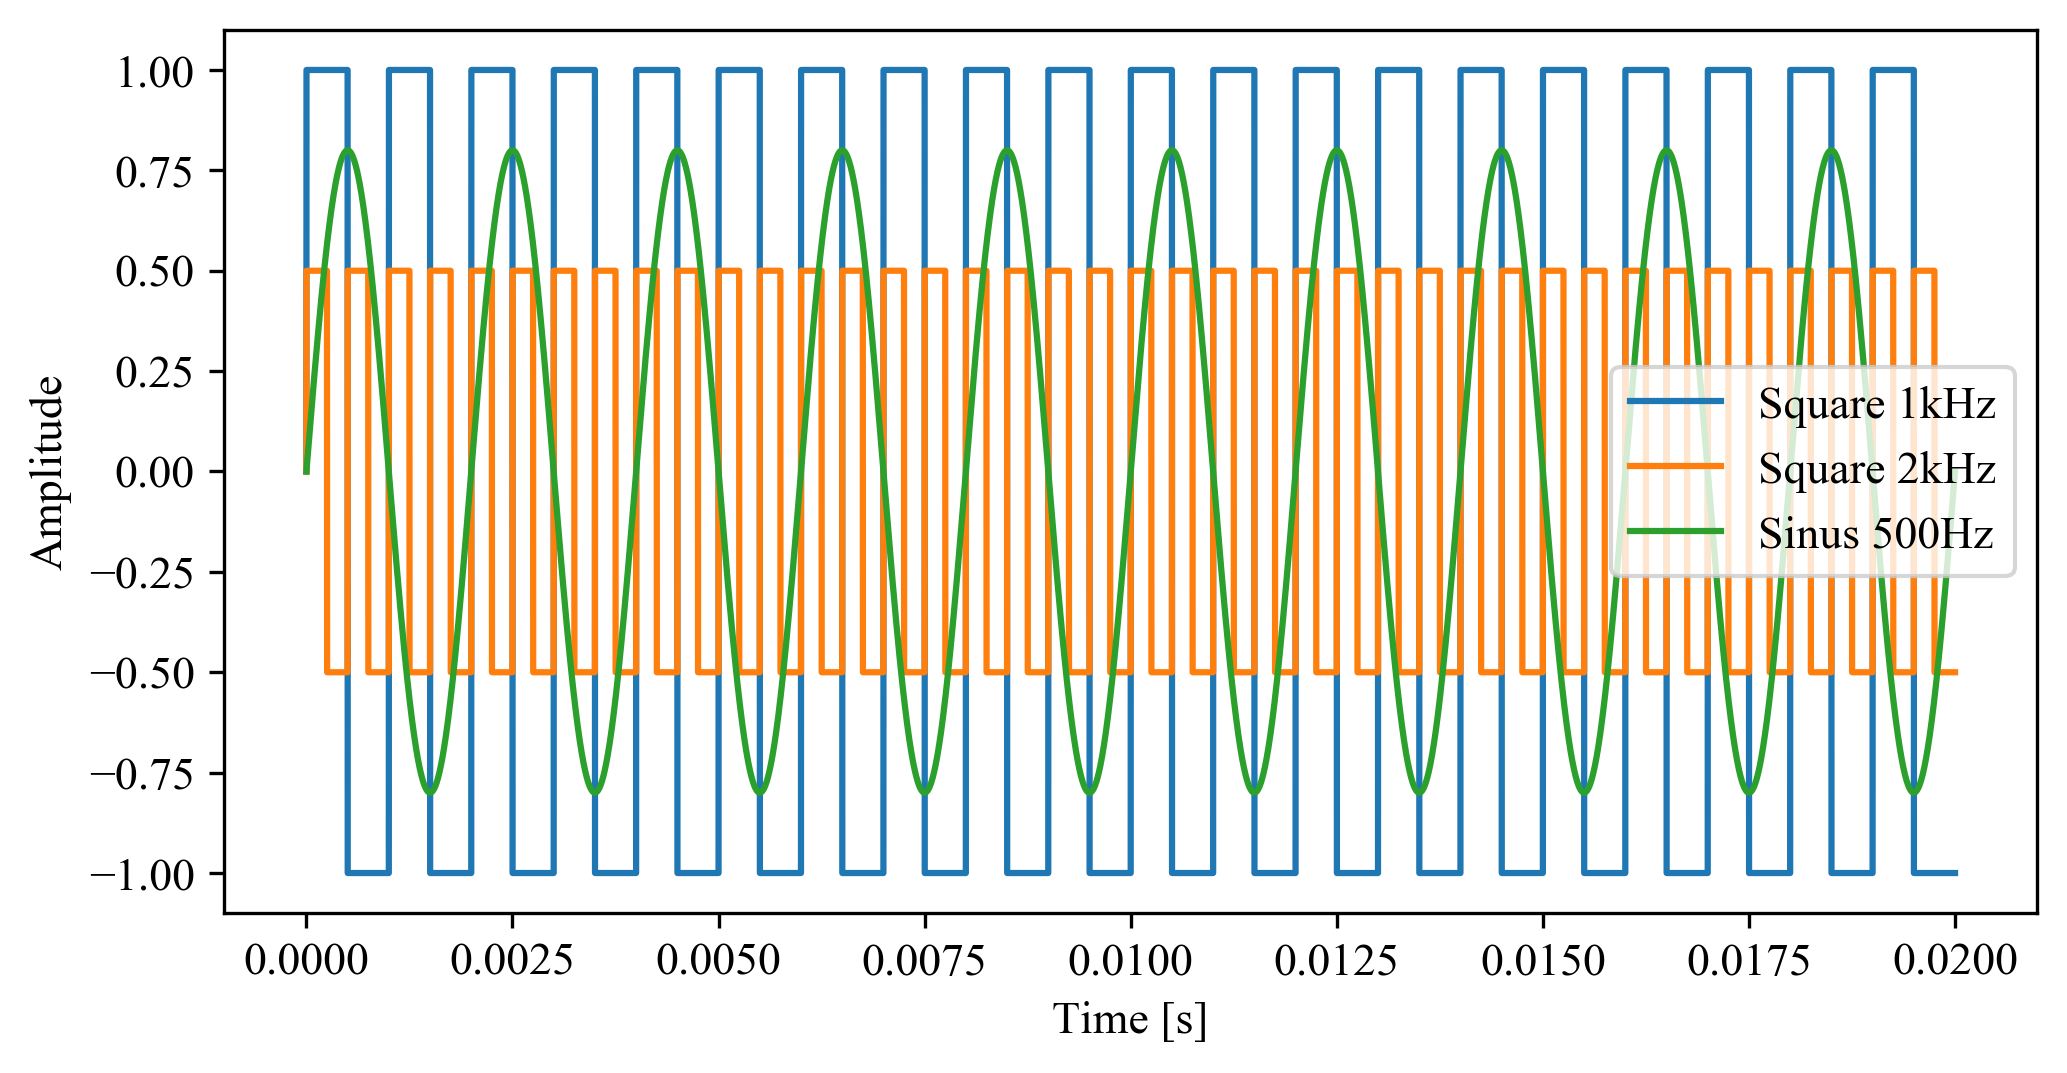

In [8]:
fig, ax = plt.subplots()
ax.plot(time, Signal1, label="Square 1kHz")
ax.plot(time, Signal2, label="Square 2kHz")
ax.plot(time, Signal3, label="Sinus 500Hz")
ax.set_ylabel('Amplitude')
ax.set_xlabel('Time [s]')
ax.legend()

In [85]:
d = {'s1': Signal1, 's2': Signal2,'s3':Signal3}
df = pd.DataFrame(data=d)
df.index = time
df.to_json("3-14.json")


In [25]:
noise = 0.05*np.random.rand(cleanSignal.shape[0])-0.025
Mix1 = Signal1 + 0.05*np.random.rand(cleanSignal.shape[0])-0.025 + 0.7*(Signal2+ 0.05*np.random.rand(cleanSignal.shape[0])-0.025) + 0.7*(Signal3+ 0.05*np.random.rand(cleanSignal.shape[0])-0.025)
Mix2 = 0.5*(Signal1+ 0.05*np.random.rand(cleanSignal.shape[0])-0.025) + 0.35*(Signal2+ 0.05*np.random.rand(cleanSignal.shape[0])-0.025) + 0.85*(Signal3+ 0.05*np.random.rand(cleanSignal.shape[0])-0.025)
Mix3 = 1.2*(Signal1+ 0.05*np.random.rand(cleanSignal.shape[0])-0.025) + 0.6*(Signal2+ 0.05*np.random.rand(cleanSignal.shape[0])-0.025) + 0.9*(Signal3+ 0.05*np.random.rand(cleanSignal.shape[0])-0.025)
Mix4 = 1.3*(Signal1+ 0.05*np.random.rand(cleanSignal.shape[0])-0.025) + 0.4*(Signal2+ 0.05*np.random.rand(cleanSignal.shape[0])-0.025) + 1.1*(Signal3+ 0.05*np.random.rand(cleanSignal.shape[0])-0.025)
Mix5 = 0.2*(Signal1+ 0.05*np.random.rand(cleanSignal.shape[0])-0.025) + 1.1*(Signal2+ 0.05*np.random.rand(cleanSignal.shape[0])-0.025) + 0.6*(Signal3 + 0.05*np.random.rand(cleanSignal.shape[0])-0.025)

In [67]:
noise = 0.05*np.random.rand(cleanSignal.shape[0])-0.025
Mix1 = Signal1  + 0.5*Signal2 + 0.7*Signal3
Mix2 = Signal1  + Signal2 + 0.4*Signal3
Mix3 = Signal1  + 0.7*Signal2 + 0.001*Signal3

In [10]:
#Mix2 = np.roll(Mix1, 15000)
#Mix3 = np.roll(Mix3, 1000)
#Mix2 = np.roll(Mix2, 500)
Mix6 = np.roll(Mix3, -1000)
Mix7 = np.roll(Mix2, -500)

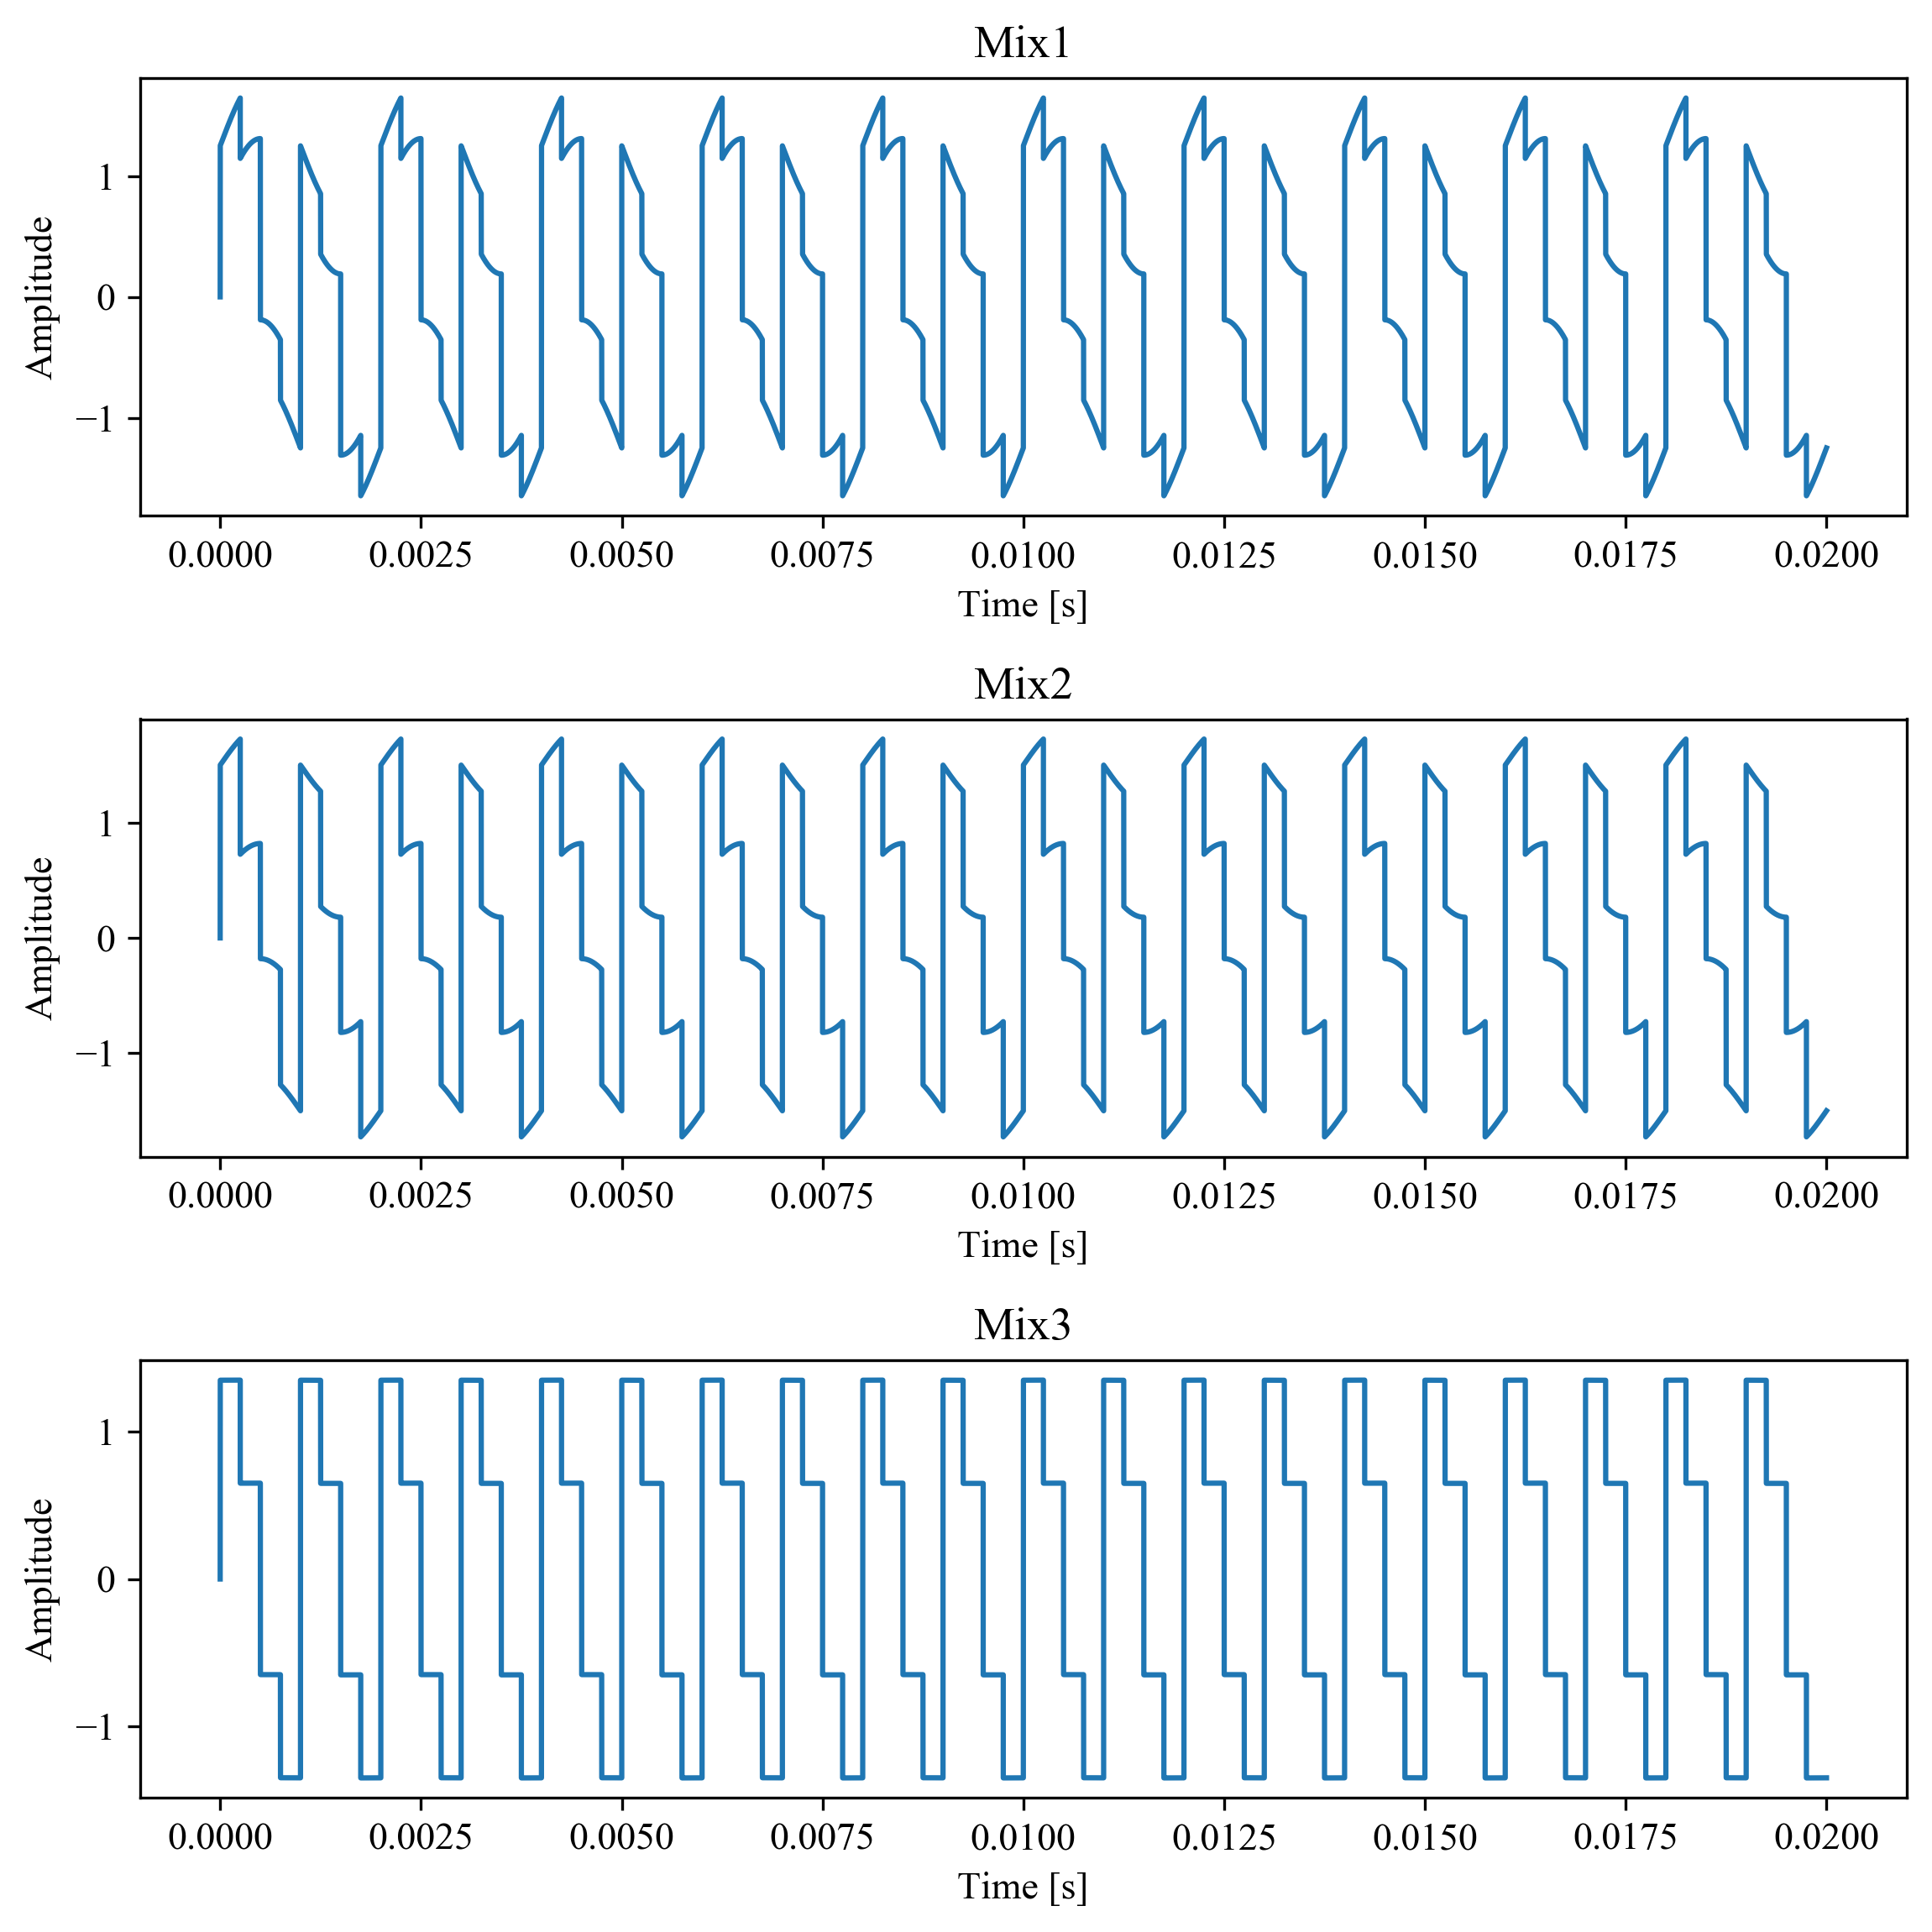

In [36]:
fig, ax = plt.subplots(3)
ax[0].plot(time, Mix1, label="Mix1")
ax[1].plot(time, Mix2, label="Mix2")
ax[2].plot(time, Mix3, label="Mix3")
ax[0].set_ylabel('Amplitude')
ax[1].set_ylabel('Amplitude')
ax[2].set_ylabel('Amplitude')
ax[0].set_xlabel('Time [s]')
ax[1].set_xlabel('Time [s]')
ax[2].set_xlabel('Time [s]')
ax[0].set_title("Mix1")
ax[1].set_title("Mix2")
ax[2].set_title("Mix3")
fig.tight_layout()

In [86]:
d = {'m1': Mix1, 'm2': Mix2,'m3':Mix3}
df = pd.DataFrame(data=d)
df.index = time
df.to_json("3-15.json")


Plotting... Results


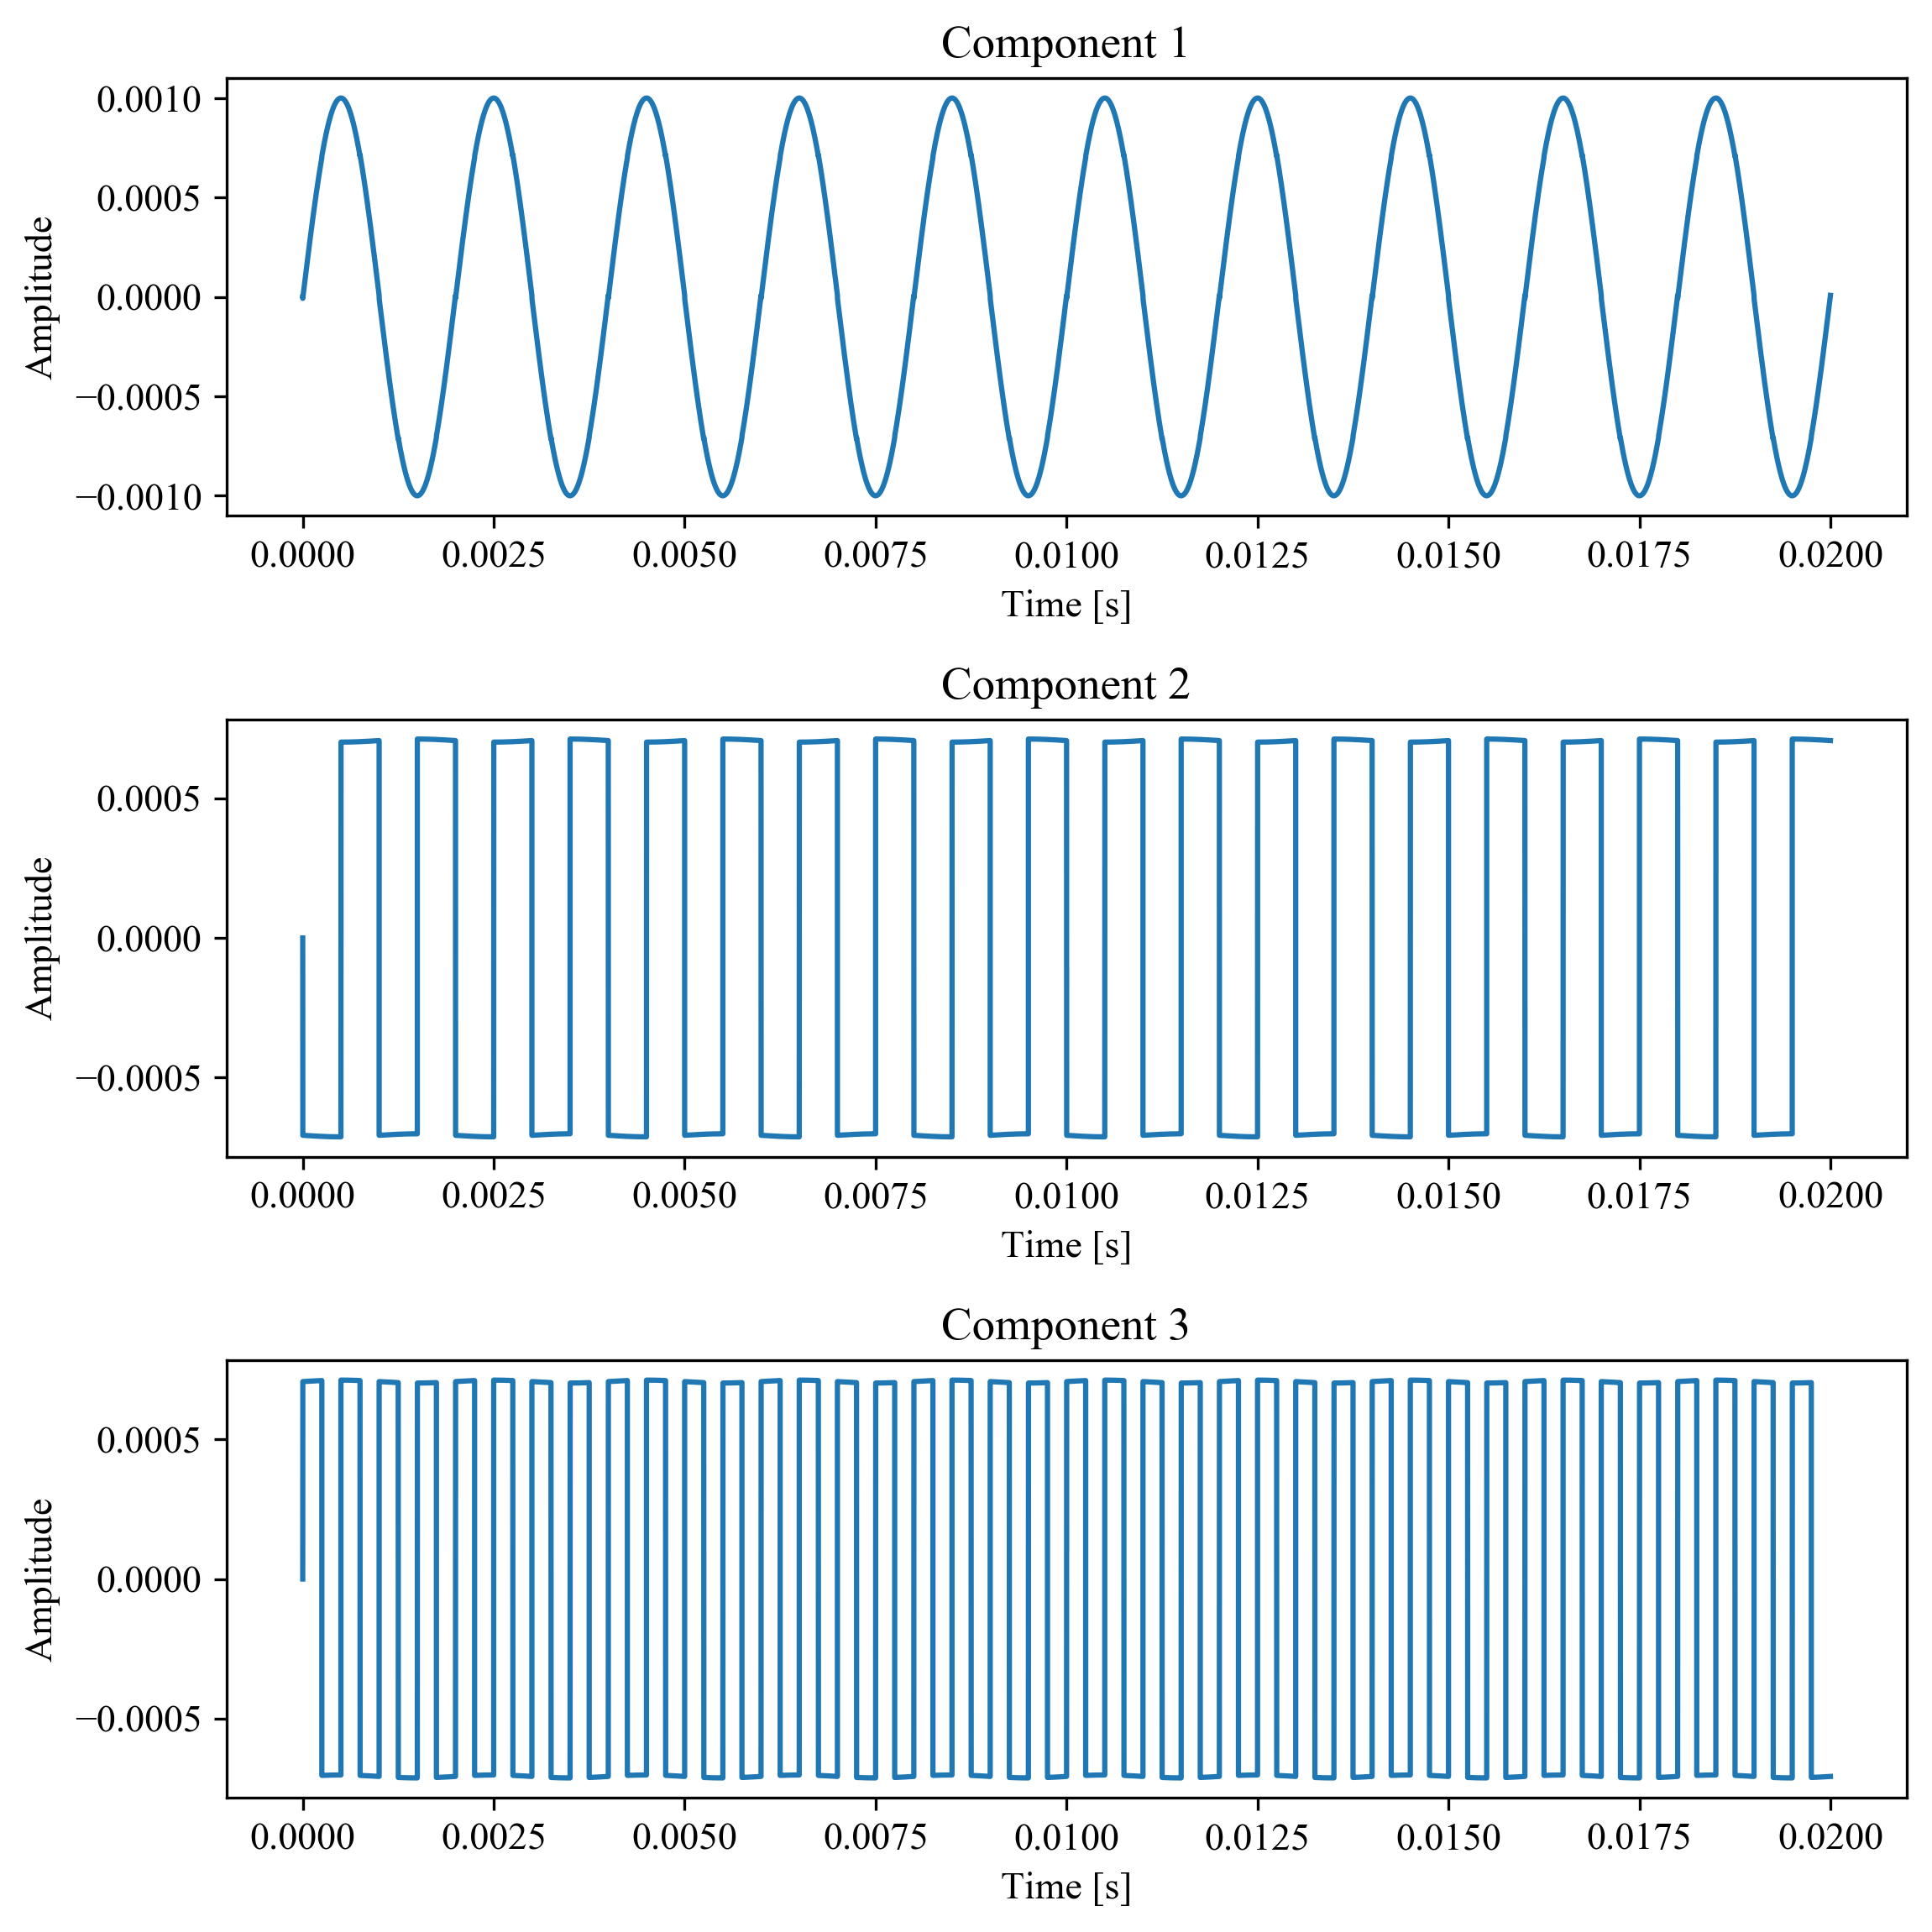

In [48]:
from pylab import rcParams
plt.rcParams['figure.figsize'] =7.8 ,7.8
plt.rcParams['legend.fontsize'] = 11
plt.rcParams["figure.dpi"] = 300
font = {'family' : 'Times New Roman','weight' : "light", 'size'   : 11}
plt.rc('font', **font)
X = np.column_stack((Mix1,Mix2,Mix3))
ica = FastICA(3)
S_ = ica.fit_transform(X)  # Reconstruct signals
#A_ = ica.mixing_  # Get estimated mixing matrix

print("Plotting... Results")
fig, ax = plt.subplots(3)
ax[0].plot(time[:], S_[:,0])
ax[1].plot(time[:], S_[:,1])
ax[2].plot(time[:], S_[:,2])

ax[0].set_ylabel('Amplitude')
ax[1].set_ylabel('Amplitude')
ax[2].set_ylabel('Amplitude')
ax[0].set_xlabel('Time [s]')
ax[1].set_xlabel('Time [s]')
ax[2].set_xlabel('Time [s]')
ax[0].set_title("Component 1")
ax[1].set_title("Component 2")
ax[2].set_title("Component 3")
fig.tight_layout()

In [87]:
d = {'c1': S_[:,0], 'c2': S_[:,1],'m3':S_[:,2]}
df = pd.DataFrame(data=d)
df.index = time
df.to_json("3-16.json")

In [ ]:
### abb 3-18

In [60]:
Mix1 = Signal1  + 2*Signal2 + 3*Signal3
Mix2 = 0.5*Signal1  + Signal2 + 1.5*Signal3
Mix3 = 0.7*Signal1  + 1.4*Signal2 + 2.1*Signal3

C:\Users\Philipp\anaconda3\lib\site-packages\sklearn\decomposition\_fastica.py:119: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  ConvergenceWarning)


Plotting... Results


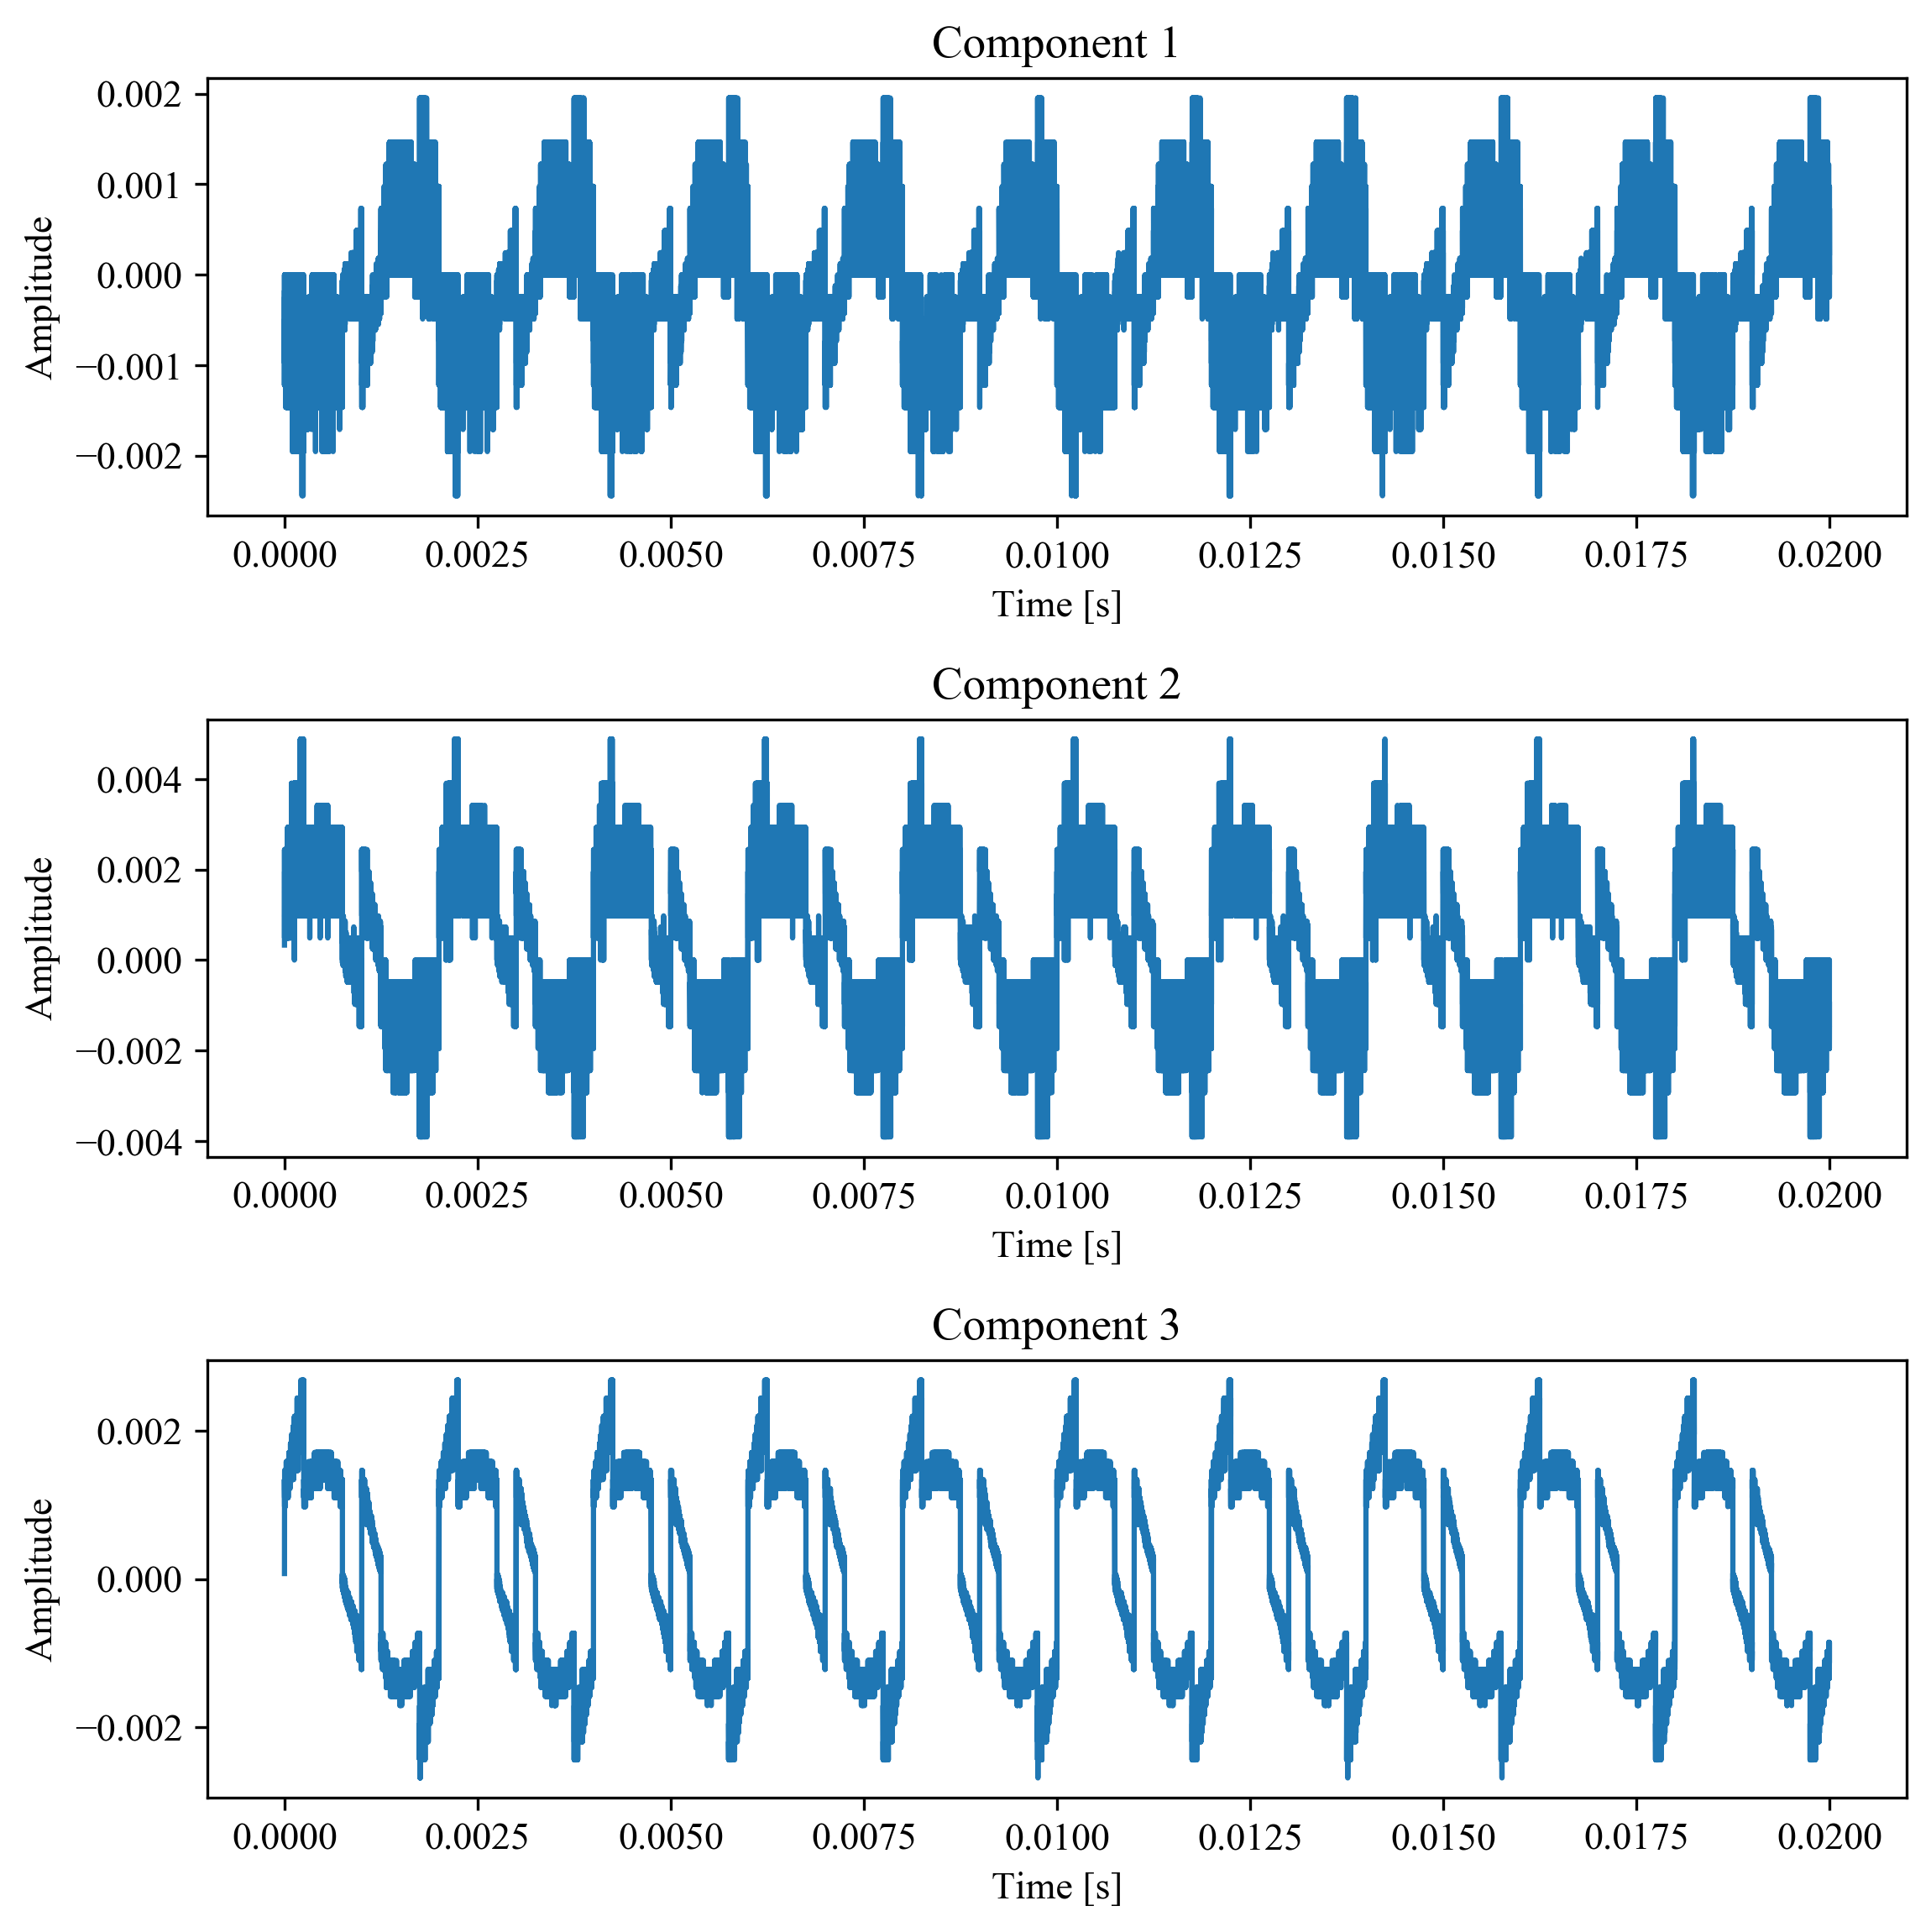

In [52]:
from pylab import rcParams
plt.rcParams['figure.figsize'] =7.8 ,7.8
plt.rcParams['legend.fontsize'] = 11
plt.rcParams["figure.dpi"] = 300
font = {'family' : 'Times New Roman','weight' : "light", 'size'   : 11}
plt.rc('font', **font)
X = np.column_stack((Mix1,Mix2,Mix3))
ica = FastICA(3)
S_ = ica.fit_transform(X)  # Reconstruct signals
#A_ = ica.mixing_  # Get estimated mixing matrix

print("Plotting... Results")
fig, ax = plt.subplots(3)
ax[0].plot(time[:], S_[:,0])
ax[1].plot(time[:], S_[:,1])
ax[2].plot(time[:], S_[:,2])

ax[0].set_ylabel('Amplitude')
ax[1].set_ylabel('Amplitude')
ax[2].set_ylabel('Amplitude')
ax[0].set_xlabel('Time [s]')
ax[1].set_xlabel('Time [s]')
ax[2].set_xlabel('Time [s]')
ax[0].set_title("Component 1")
ax[1].set_title("Component 2")
ax[2].set_title("Component 3")
fig.tight_layout()

### Erster Ansatz: Varianz des Rauschens

In [26]:
Mix1_noisy1 = Mix1 + 0.05*np.random.rand(cleanSignal.shape[0])-0.025
Mix1_noisy2 = Mix1 + 0.05*np.random.rand(cleanSignal.shape[0])-0.025
Mix1_noisy3 = Mix1 + 0.05*np.random.rand(cleanSignal.shape[0])-0.025

Plotting... Results


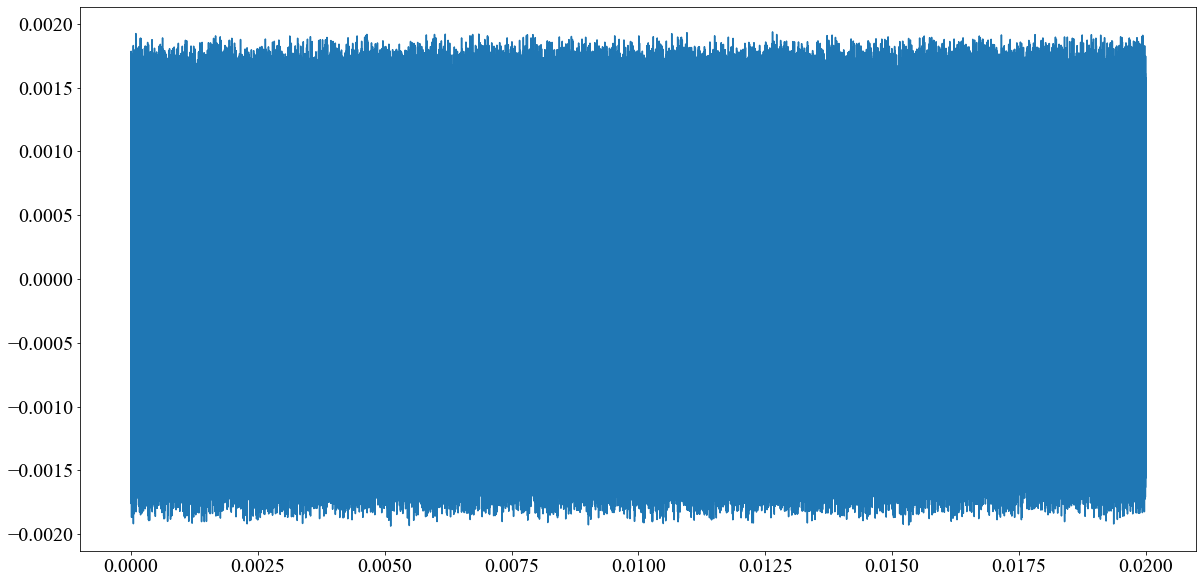

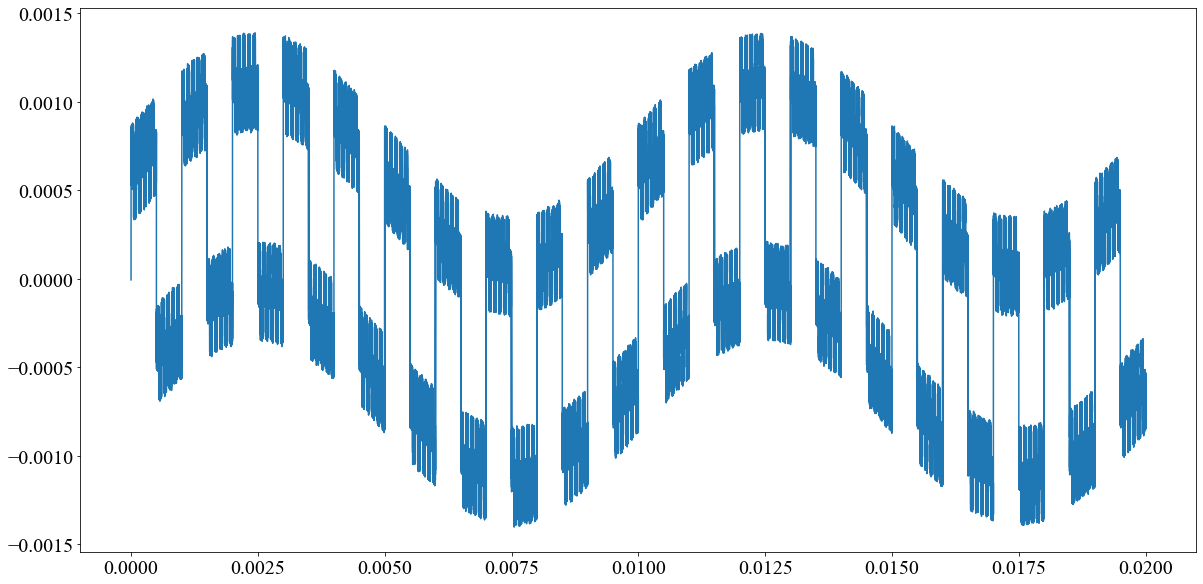

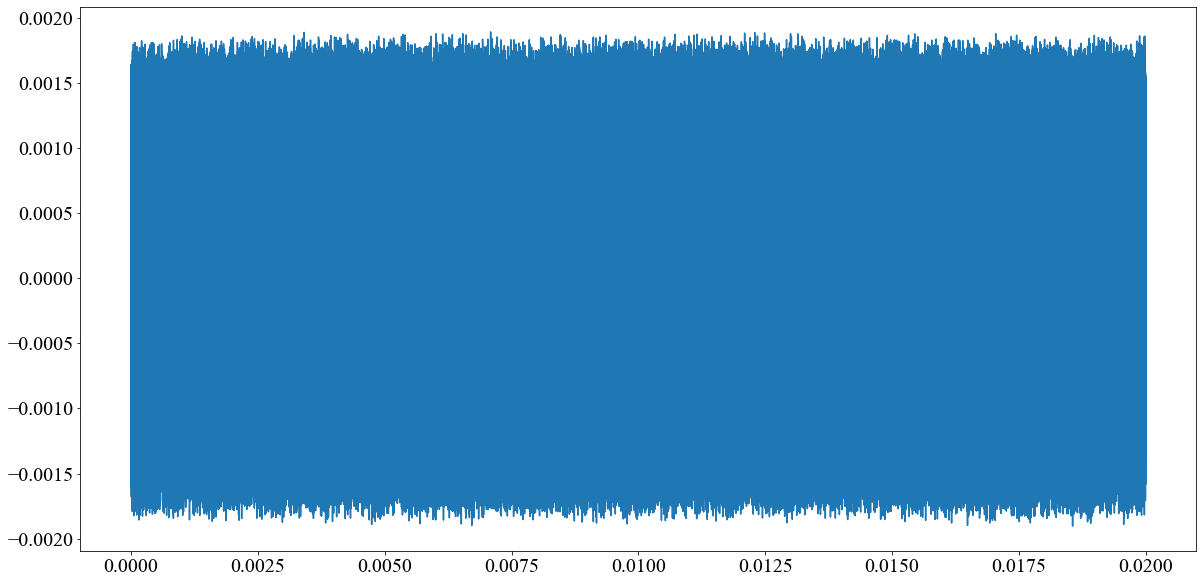

In [28]:
X = np.column_stack((Mix1_noisy1,Mix1_noisy2,Mix1_noisy3))
ica = FastICA()
S_ = ica.fit_transform(X)  # Reconstruct signals
#A_ = ica.mixing_  # Get estimated mixing matrix
print("Plotting... Results")
plt.plot(time[:], S_[:,0])
plt.show()
plt.plot(time[:], S_[:,1])
plt.show()
plt.plot(time[:], S_[:,2])
plt.show()



## Funktioniert nicht !!!
# Abb 3-19
#### Nächster Ansatz: 
#### - untersch. Mixverhältnisse

In [53]:
Mix1 = .5*Signal1 + .8*Signal2 + .4*Signal3
Mix2 = .04*Signal1 + .9*Signal2 + .6*Signal3
Mix3 = .003*Signal1 + .05*Signal2 + .09*Signal3

Plotting... Results


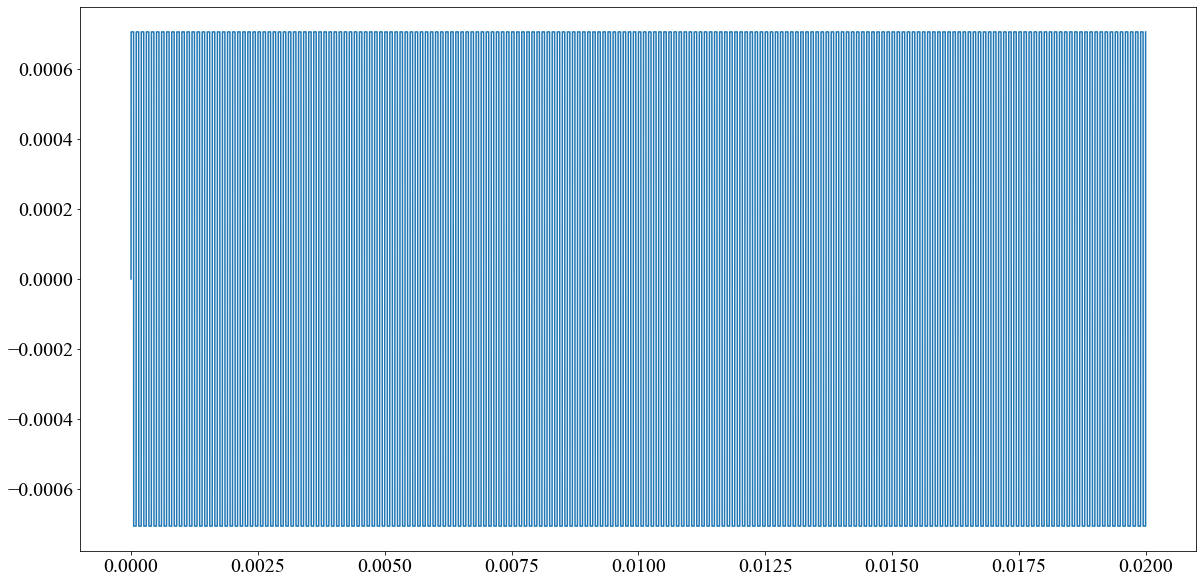

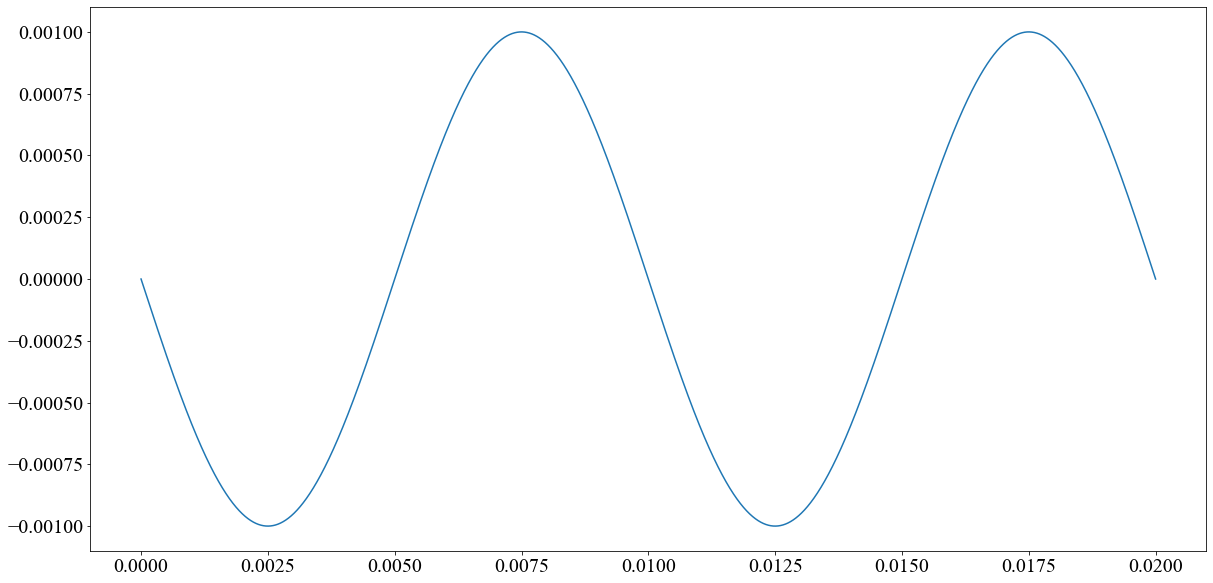

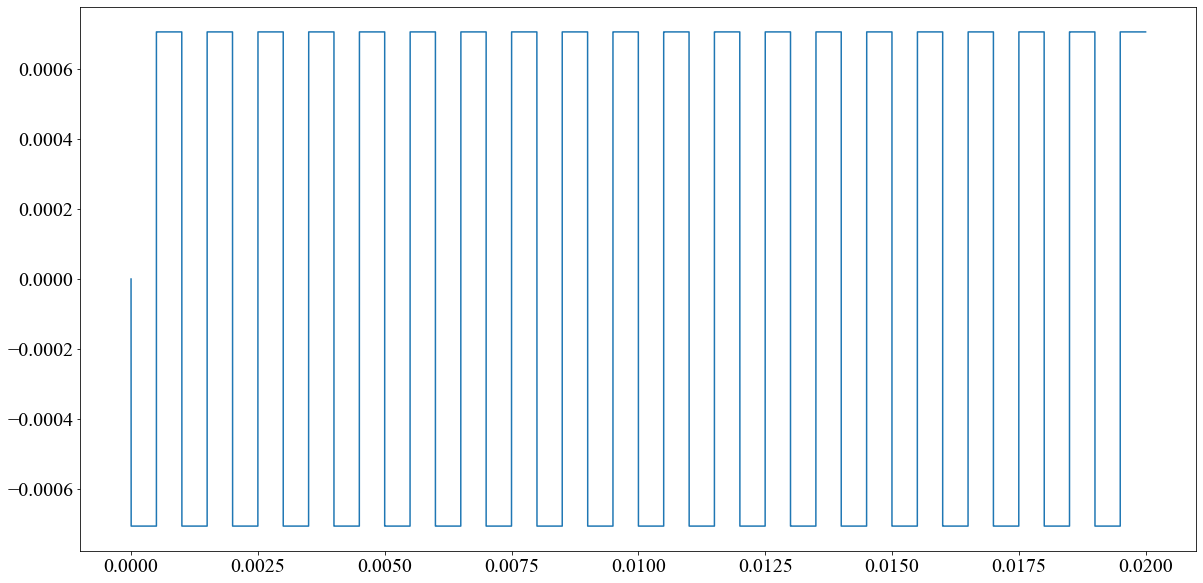

In [31]:
X = np.column_stack((Mix1,Mix2,Mix3))
ica = FastICA()
S_ = ica.fit_transform(X)  # Reconstruct signals
#A_ = ica.mixing_  # Get estimated mixing matrix
print("Plotting... Results")
plt.plot(time[:], S_[:,0])
plt.show()
plt.plot(time[:], S_[:,1])
plt.show()
plt.plot(time[:], S_[:,2])
plt.show()

# Funktioniert sehr gut - Jetzt mit Rauschen!

In [79]:
noise = 0.05*np.random.rand(cleanSignal.shape[0])-0.025
Mix1_noisy = Mix1 + 0.05*np.random.rand(cleanSignal.shape[0])-0.025
Mix2_noisy = Mix2 + 0.05*np.random.rand(cleanSignal.shape[0])-0.025
Mix3_noisy = Mix3 + 0.05*np.random.rand(cleanSignal.shape[0])-0.025
Mix4_noisy = .04*Signal1 + .9*Signal2 + .6*Signal3 + 0.05*np.random.rand(cleanSignal.shape[0])-0.025

Plotting... Results


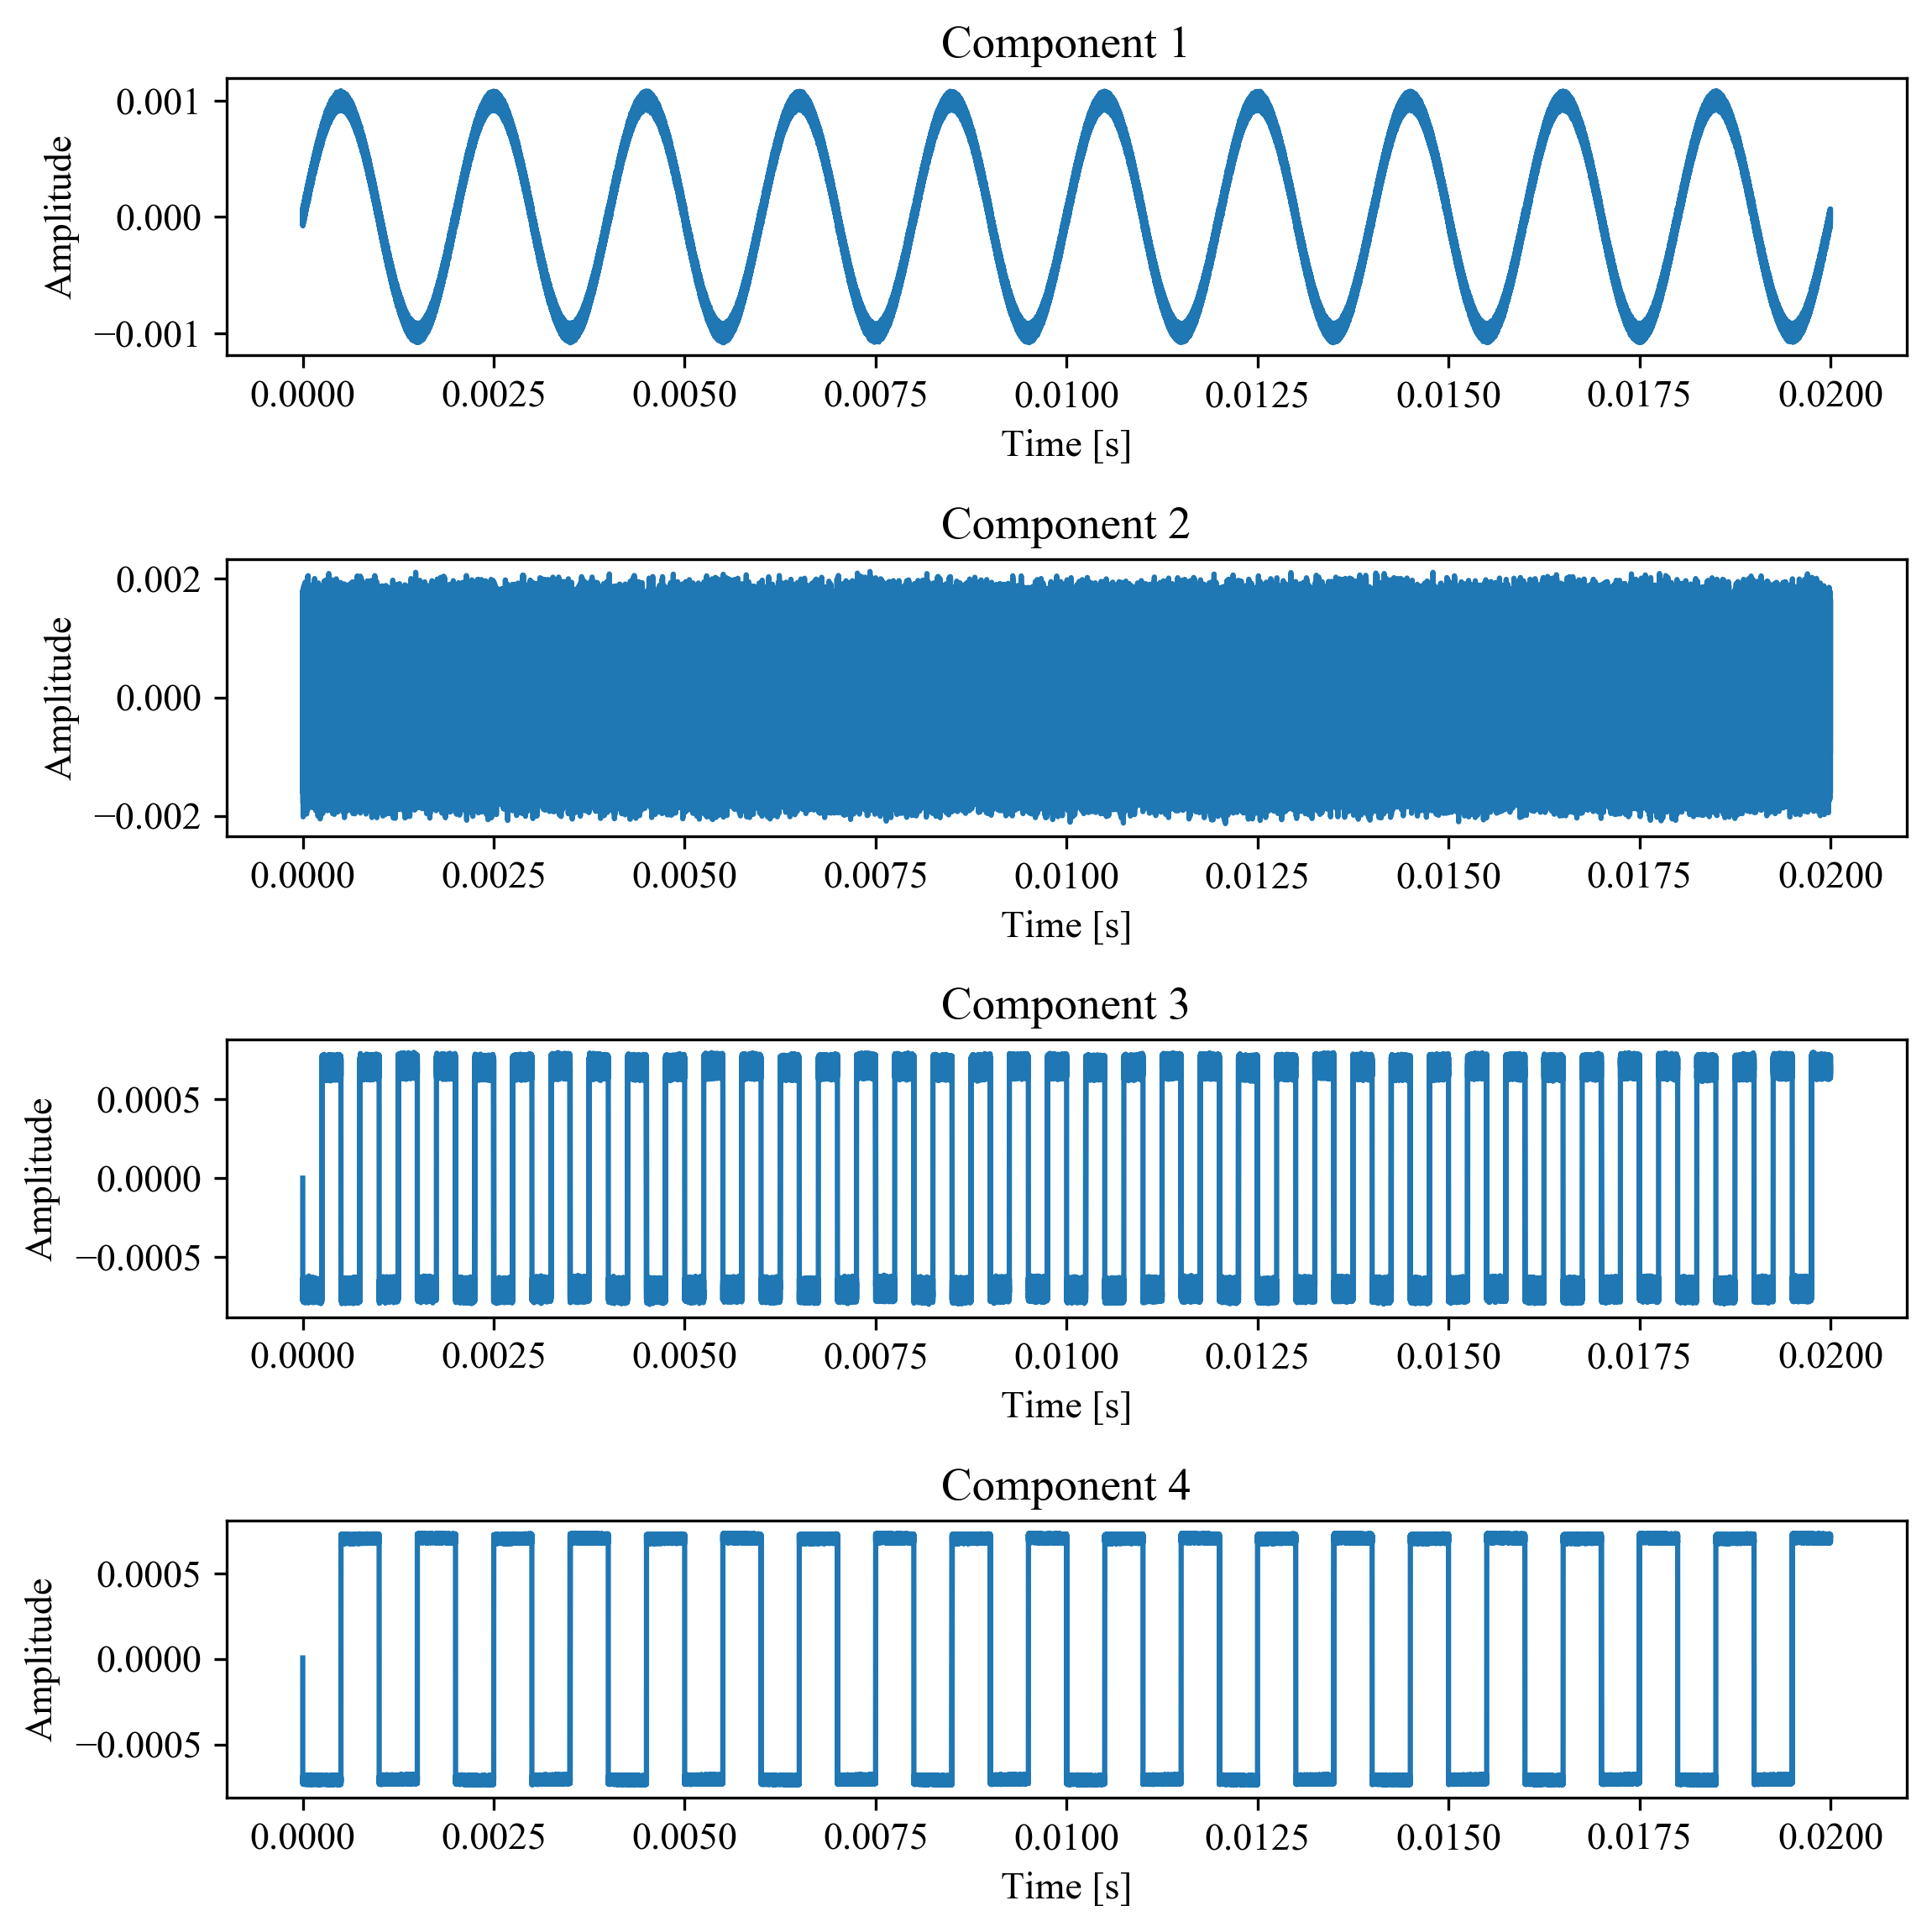

In [80]:
X = np.column_stack((Mix1_noisy,Mix2_noisy,Mix3_noisy,Mix4_noisy))
ica = FastICA(4)
S_ = ica.fit_transform(X)  # Reconstruct signals
#A_ = ica.mixing_  # Get estimated mixing matrix
print("Plotting... Results")
fig, ax = plt.subplots(4)
ax[0].plot(time[:], S_[:,0])
ax[1].plot(time[:], S_[:,1])
ax[2].plot(time[:], S_[:,2])
ax[3].plot(time[:], S_[:,3])
ax[0].set_ylabel('Amplitude')
ax[1].set_ylabel('Amplitude')
ax[2].set_ylabel('Amplitude')
ax[3].set_ylabel('Amplitude')
ax[0].set_xlabel('Time [s]')
ax[1].set_xlabel('Time [s]')
ax[2].set_xlabel('Time [s]')
ax[3].set_xlabel('Time [s]')
ax[0].set_title("Component 1")
ax[1].set_title("Component 2")
ax[2].set_title("Component 3")
ax[3].set_title("Component 4")
fig.tight_layout()

Auch wenn der ganze Mix verrauscht wird, die einzelnen Signale sind erkennbar.
Jetzt der Härtetest: verrauschte Signale in verrauschtem Mix, aber immer selbes Rauschen.

In [38]:
noise = 0.05*np.random.rand(cleanSignal.shape[0])-0.025
Mix1 = .5*Signal1 + .8*Signal2 + .4*Signal3 + noise
Mix2 = .04*Signal1 + .9*Signal2 + .6*Signal3 + noise
Mix3 = .003*Signal1 + .05*Signal2 + .09*Signal3 + noise

Plotting... Results


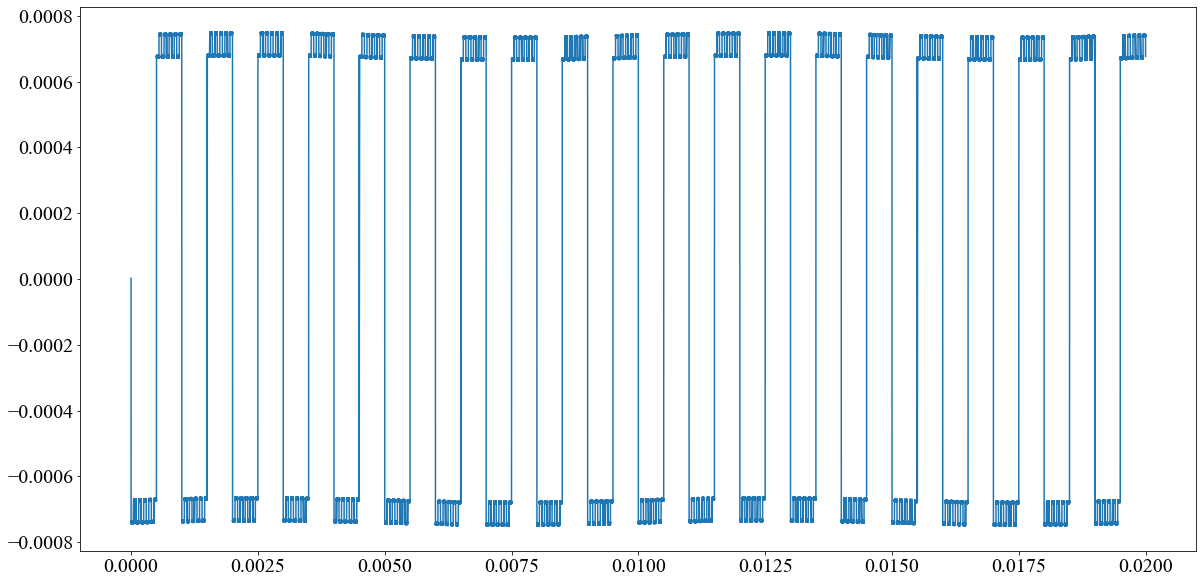

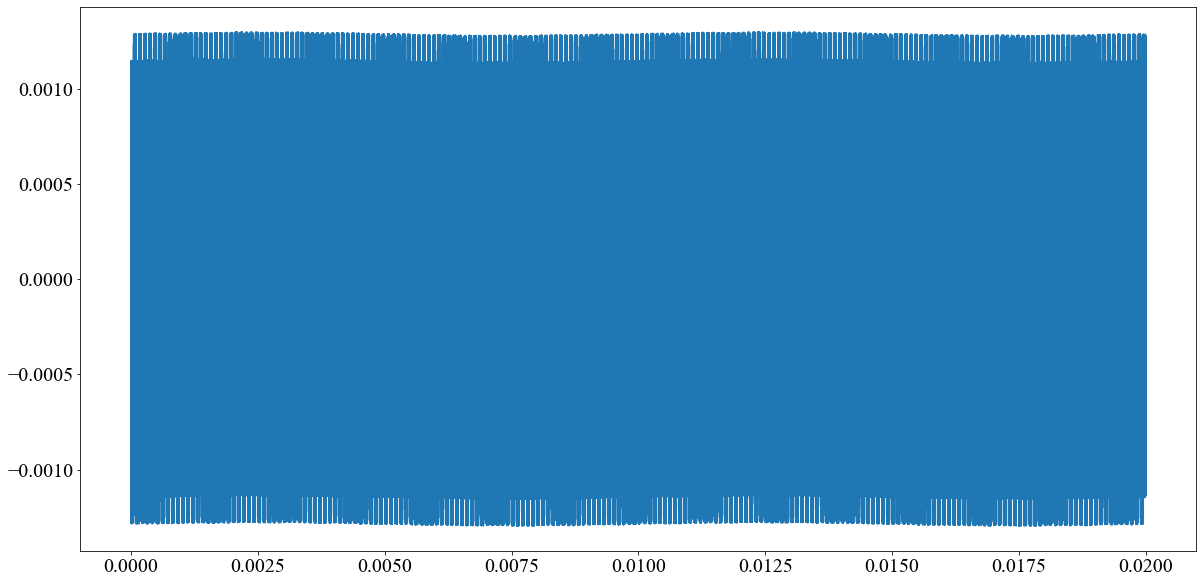

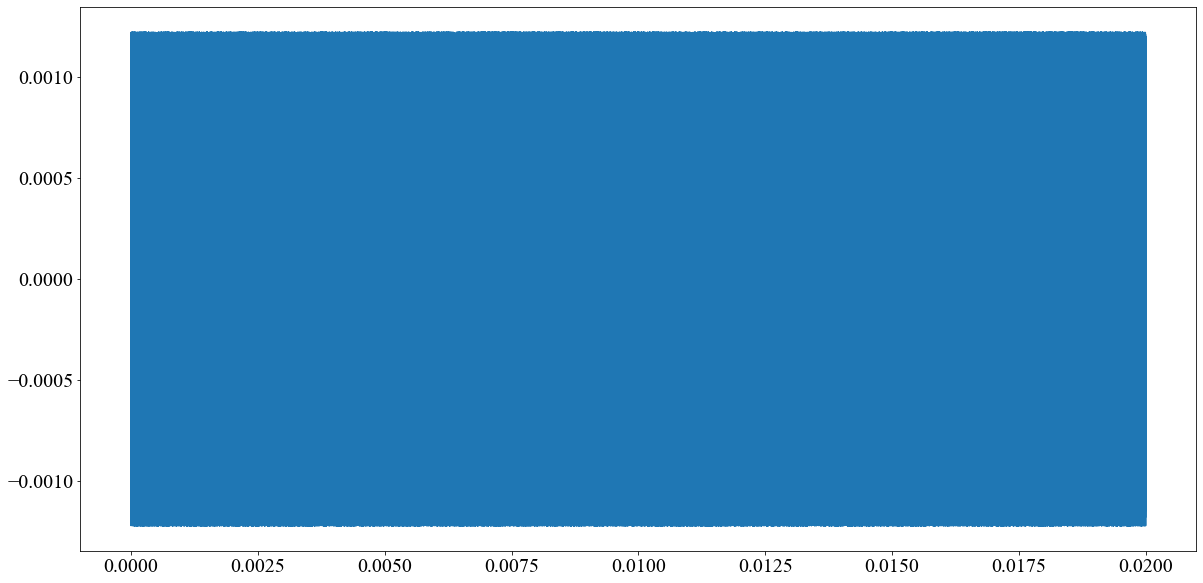

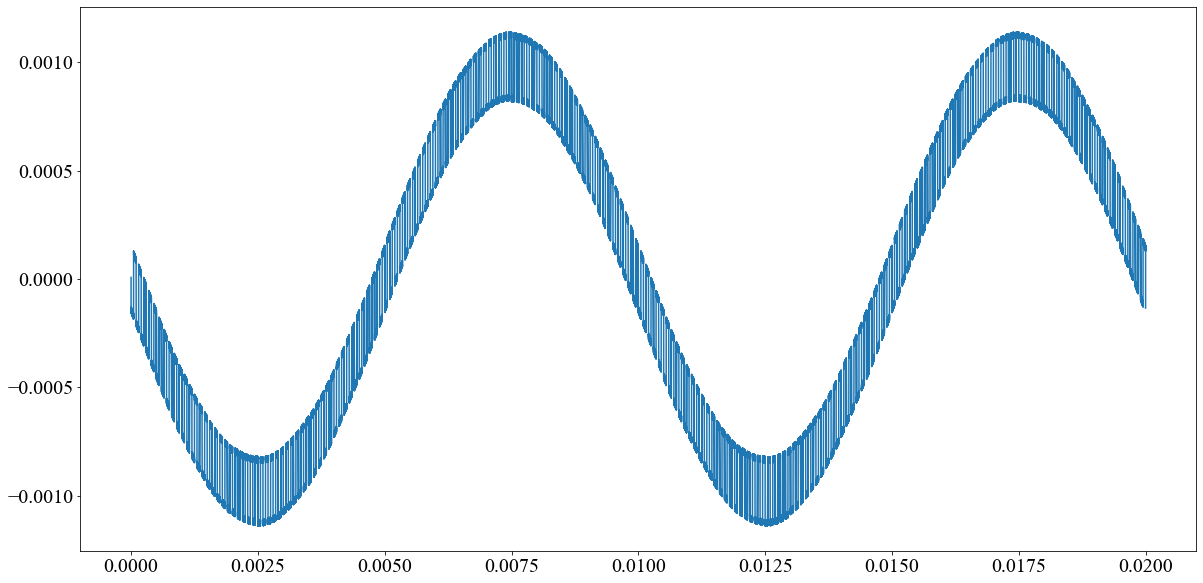

In [43]:
X = np.column_stack((Mix1,Mix2,Mix3,noise[::-1]))
ica = FastICA()
S_ = ica.fit_transform(X)  # Reconstruct signals
#A_ = ica.mixing_  # Get estimated mixing matrix
print("Plotting... Results")
plt.plot(time[:], S_[:,0])
plt.show()
plt.plot(time[:], S_[:,1])
plt.show()
plt.plot(time[:], S_[:,2])
plt.show()
plt.plot(time[:], S_[:,3])
plt.show()

## Versuch: Ein Zeitfenster mit verrauschtem Mix splitten

In [104]:
Mix1 = .5*Signal1 + .5*Signal2 + 5*Signal3 + 0.05*np.random.rand(cleanSignal.shape[0])-0.025
Mix2 = 3*Signal1 + .49*Signal2 + .6*Signal3 + 0.05*np.random.rand(cleanSignal.shape[0])-0.025
Mix3 = .3*Signal1 + 2*Signal2 + .7*Signal3 + 0.05*np.random.rand(cleanSignal.shape[0])-0.025
Mix4 = .2*Signal1 + .47*Signal2 + .9*Signal3 + 0.05*np.random.rand(cleanSignal.shape[0])-0.025

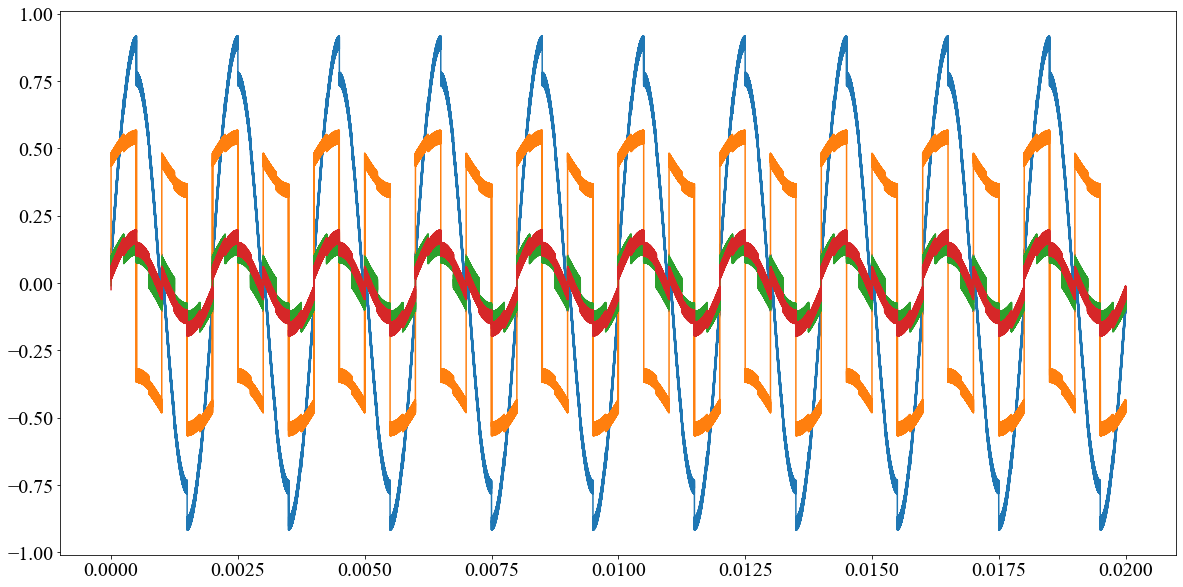

In [105]:
plt.plot(time, Mix1)
plt.plot(time, Mix2)
plt.plot(time, Mix3)
plt.plot(time, Mix4)

Plotting... Results


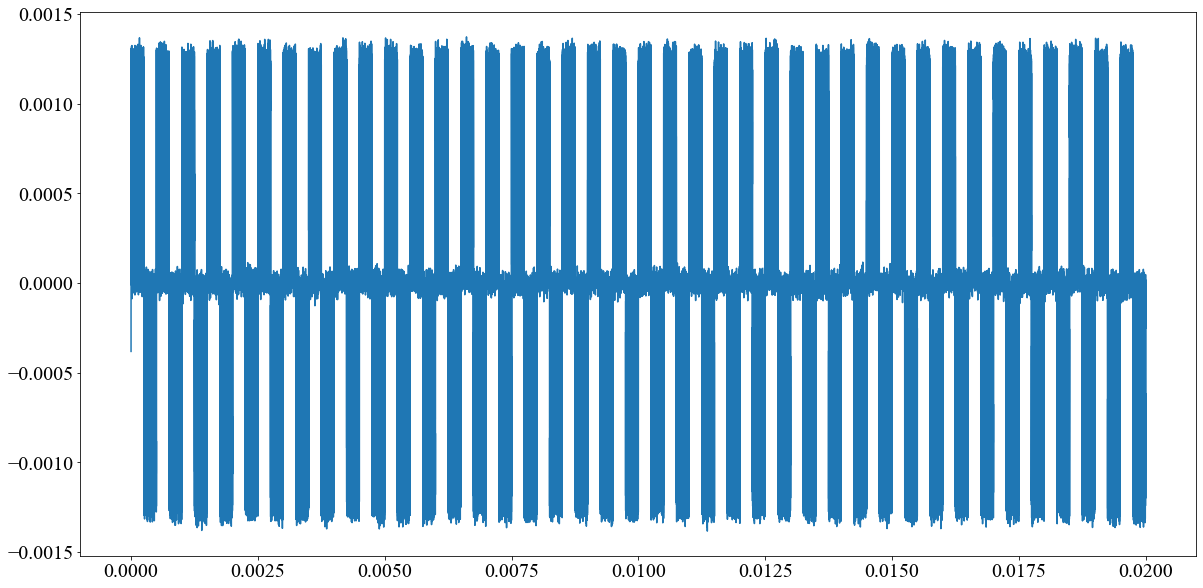

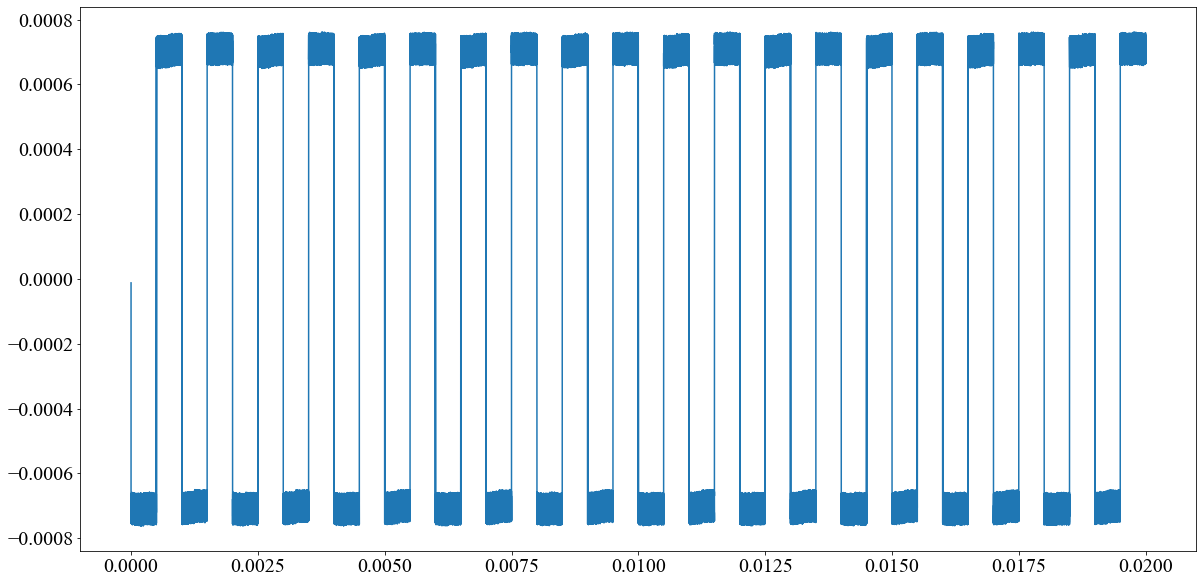

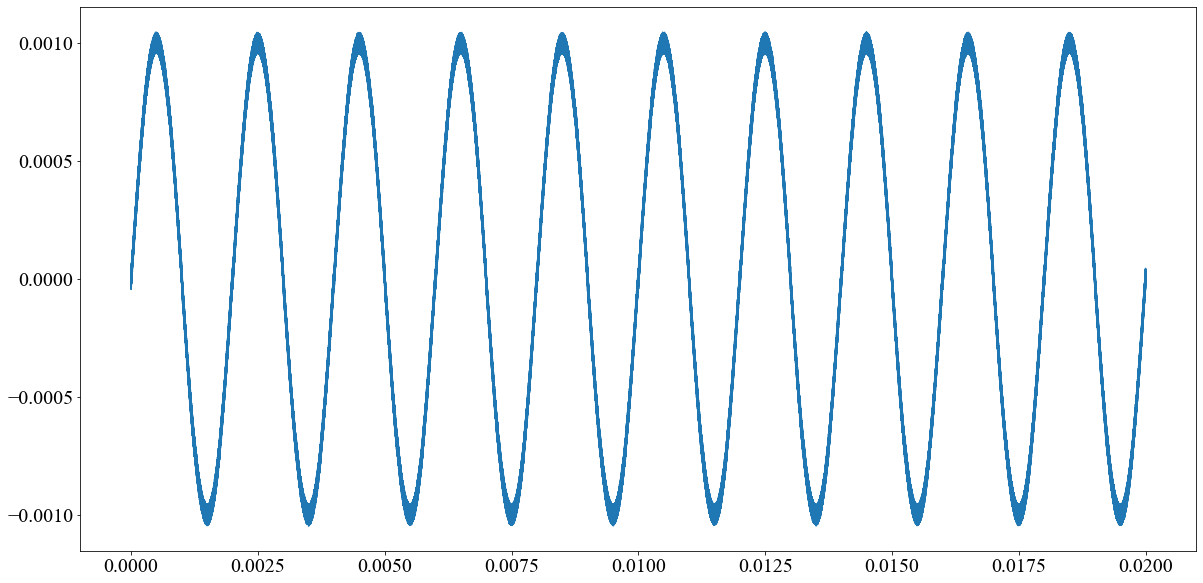

In [106]:
X = np.column_stack((Mix1,Mix2,Mix3,Mix4))
ica = FastICA(3)
S_ = ica.fit_transform(X)  # Reconstruct signals
#A_ = ica.mixing_  # Get estimated mixing matrix
print("Plotting... Results")
plt.plot(time[:], S_[:,0])
plt.show()
plt.plot(time[:], S_[:,1])
plt.show()
plt.plot(time[:], S_[:,2])
plt.show()